# Predição de Insuficiência Cardíaca via Rede Neural Multilayer Perceptron e Otimização por Grid Search


---



#Introdução ao trabalho

A insuficiência cardíaca (IC) é uma síndrome clínica que acontece com qualquer disfunção cardíaca estrutural ou funcional, que dificulta a ação do ventríloquo em se preencher ou ejetar sangue [American Heart Association, 2005]. Em geral, o quadro clínico inclui a presença de dispneia acompanhada de edema periférico e congestão pulmonar, mas também pode demonstrar sintomas como taquicardia, bolhas patológicas, sopros cardíacos e estase jugular [Santos e Bittencourt, 2008]. Sua complexidade clínica, associada a fatores de risco multifatoriais, exige métodos precisos e ágeis para identificação precoce de pacientes em risco, e por isso a análise de dados clínicos surge como uma ferramenta promissora, permitindo a extração de padrões ocultos que podem orientar decisões médicas mais assertivas.

Nesse contexto, uma rede neural artificial (RNA) do tipo Multilayer Perceptron (MLP) pode se mostrar uma ferramenta prática para a classificação dos casos clínicos de IC. RNAs desse tipo são sistemas paralelos distribuídos, compostos por camadas pequenas de perceptrons, onde cada um contém funções de ativação específica se baseando em uma forma de aprendizagem supervisionada, onde o erro dessas análises deve ser minimizado constantemente via algoritmos Blackpropagation. [Lima et.al., 2016].

Pensando nisso, o principal objetivo deste trabalho é desenvolver um modelo de RNA do tipo MLP para classificação binária de pacientes com risco de insuficiência cardíaca, utilizando um conjunto de dados clínicos que inclui variáveis como idade, pressão arterial, colesterol e indicadores de eletrocardiograma. A escolha do MLP justifica-se pela sua capacidade de aprender relações não lineares em dados tabulares, adaptando-se às especificidades de problemas médicos, onde a interpretação de múltiplas variáveis inter-relacionadas é crítica.


# Definição do Problema

Classificação binária (presença ou ausência de insuficiência cardíaca).

A insuficiência cardíaca é uma condição multifatorial, cuja identificação precoce depende da análise integrada de parâmetros clínicos e demográficos. Embora modelos tradicionais de aprendizado de máquina, como a regressão logística e Random Forest sejam amplamente utilizados para essa tarefa, sua eficácia em capturar relações não lineares complexas entre variáveis clínicas pode ser limitada. Nesse cenário, propõe-se investigar o potencial de redes neurais artificiais (RNAs), especificamente uma arquitetura Multilayer Perceptron (MLP), na classificação binária de pacientes com risco de insuficiência cardíaca. Para isso,Este trabalho busca resolver as seguintes questões:

Qual a precisão, recall e F1-Score do modelo MLP na predição de risco de insuficiência cardíaca com otimização por Grid Search?

Quais variáveis clínicas têm maior impacto nas predições do modelo?

Quais as limitações do modelo?

#Descrição do Conjunto de dados

Os dados foram coletados do Kaggle (Heart Failure Prediction Dataset), conforme link a seguir: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

As variáveis são:

Numéricas: Age, RestingBP, Cholesterol, MaxHR, Oldpeak.

Categóricas: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope.

Target: HeartDisease (binário: 0 ou 1).

---

* Idade (Age): Idade do paciente (em anos).

* Sexo (Sex): Sexo do paciente (M: Masculino, F: Feminino).

* Tipo de Dor no Peito (ChestPainType): Tipo de dor torácica relatada:

  * TA: Angina Típica (dor relacionada a redução de fluxo sanguíneo no coração).

  * ATA: Angina Atípica (dor não característica de angina clássica).

  * NAP: Dor Não Anginal (dor não relacionada ao coração).

  * ASY: Assintomático (sem dor associada).

* Pressão Arterial em Repouso (RestingBP): Pressão sanguínea medida em repouso (mm Hg).

* Colesterol Sérico (Cholesterol): Nível de colesterol no sangue (mm/dl).

* Glicemia em Jejum (FastingBS): Nível de açúcar no sangue após jejum:

  * 1: Glicemia > 120 mg/dl (indicativo de risco aumentado).

  * 0: Glicemia ≤ 120 mg/dl.

* Eletrocardiograma em Repouso (RestingECG): Resultados do eletrocardiograma em repouso:

  * Normal: Sem alterações.

  * ST: Anormalidade na onda ST-T (elevação/depressão > 0.05 mV).

  * LVH: Hipertrofia ventricular esquerda (critérios de Estes).

* Frequência Cardíaca Máxima (MaxHR): Maior frequência cardíaca registrada durante esforço (valor entre 60 e 202).

* Angina Induzida por Exercício (ExerciseAngina): Ocorrência de angina durante exercício físico (Y: Sim, N: Não).

* Depressão do Segmento ST (Oldpeak): Medida da depressão do segmento ST no eletrocardiograma após exercício.

* Inclinação do Segmento ST (ST_Slope): Direção da inclinação do segmento ST durante pico de esforço:

  * Up: Ascendente.

  * Flat: Plano

  * Down: Descendente.

* Doença Cardíaca (HeartDisease): Classe alvo (1: Presença de doença cardíaca, 0: Normal).

# Metodologia

A metodologia desse trabalho foi dividida em 3 etapas fundamentais:

* Coleta e pré-processamento de dados

* Análise descritiva e exploratória de dados

* Aplicação da Rede Neural com Grid Search

Na etapa de coleta e pré-processamento, o conjunto de dados Heart Failure Prediction foi obtido do Kaggle, contendo 918 registros clínicos de pacientes. Inicialmente, verificou-se a ausência de valores ausentes, garantindo a integridade dos dados. Em seguida, foi avaliada a remoção dos os registros com valores improváveis, como 0 batimentos em repouso. Para tratar variáveis categóricas como Sex, ChestPainType e ST_Slope, aplicou-se a técnica de One-Hot Encoding nas variáveis com mais de duas categorias, convertendo-as em representações numéricas binárias. As variáveis com duas categorias foram convertidas usando Label Encoder, também para valores binário. Posteriormente, os dados foram separados em conjunto de treino e test, e normalizados com Standar Scaler.

Na fase de análise descritiva e exploratória de dados, foram calculadas estatísticas descritivas (média, desvio padrão, quartis) para compreender as características e a distribuição dos dados, e realizada uma análise de correlação (através de matriz de correlação e pairplots) para identificar as relações entre as variáveis numéricas. Também foram observadas as distribuições das variáveis categóricas e do target.

Na etapa final de aplicação da rede neural com Grid Search, implementou-se uma arquitetura Multilayer Perceptron (MLP) com um espaço de buscas para otimizar hiperparâmetros críticos, como taxa de aprendizado, número de épocas, número de neurônios por camada oculta, número de camadas ocultas, otimizador e tamanho do bach. O modelo foi treinado com Early Stopping para interromper o treinamento caso não houvesse melhoria na validação após 5 épocas. As métricas de avaliação incluíram precisão, recall e F1-Score, além da matriz de confusão, com validação cruzada K-Fold (k=3) para garantir robustez, que foram analisados nos resultados.

### Coleta e Pré-processamento dos dados

#### Importação de bibliotecas e download dos dados

In [ ]:
!pip install tensorflow -q
!pip install scikeras -q
#!pip install joblib -q

In [ ]:
!pip uninstall -y scikit-learn -q
!pip install scikit-learn==1.5.2 -q
!pip install shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.1 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -q fedesoriano/heart-failure-prediction -p /content/hfp_data
!unzip -q -o "/content/hfp_data/heart-failure-prediction.zip" -d "/content/hfp_data"

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0


In [ ]:
df_heart_failure = pd.read_csv('/content/hfp_data/heart.csv')
df_heart_failure.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Remoção de valores ausente

In [ ]:
print(df_heart_failure.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Não possui valores ausentes

#### Remoção de valores improváveis

In [ ]:
df_heart_failure.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Nota-se que os RestingBP Cholesterol possuem o valor 0, o que não faz sentido. Abaixo eu verifico a quantidade de registros

In [ ]:
print(df_heart_failure['Cholesterol'][df_heart_failure['Cholesterol'] ==0].value_counts().reset_index())
print(df_heart_failure['RestingBP'][df_heart_failure['RestingBP'] ==0].value_counts().reset_index())

   Cholesterol  count
0            0    172
   RestingBP  count
0          0      1


Como são 173 registros, de um total de 918, optarei pela remoção dessas linhas.

In [ ]:
df_heart_failure = df_heart_failure[df_heart_failure['Cholesterol'] != 0]
df_heart_failure = df_heart_failure[df_heart_failure['RestingBP'] != 0]

In [ ]:
linhas = df_heart_failure.shape[0]
colunas = df_heart_failure.shape[1]
print(f'O dataset agora possui: \nLinhas: {linhas}\nColunas: {colunas}')

O dataset agora possui: 
Linhas: 746
Colunas: 12


#### Codificação de variáveis categóricas

In [ ]:
df_heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [ ]:
df_nao_numericas = df_heart_failure.select_dtypes(exclude=['number'])
df_numericas = df_heart_failure.select_dtypes(include=['number'])

for coluna in df_nao_numericas.columns:
  print(f"Valores únicos da coluna '{coluna}': {df_nao_numericas[coluna].unique()}")

Valores únicos da coluna 'Sex': ['M' 'F']
Valores únicos da coluna 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Valores únicos da coluna 'RestingECG': ['Normal' 'ST' 'LVH']
Valores únicos da coluna 'ExerciseAngina': ['N' 'Y']
Valores únicos da coluna 'ST_Slope': ['Up' 'Flat' 'Down']


In [ ]:
def categorical_to_numeric(df_heart_failure):
  le = LabelEncoder()
  df_heart_failure['Sex'] = le.fit_transform(df_heart_failure['Sex'])
  df_heart_failure['ExerciseAngina'] = le.fit_transform(df_heart_failure['ExerciseAngina'])
  df_heart_failure = pd.get_dummies(df_heart_failure, columns=df_nao_numericas.columns.difference(['Sex', 'ExerciseAngina']), drop_first=True)

  return df_heart_failure

In [ ]:
df_processed = categorical_to_numeric(df_heart_failure.copy())
df_processed.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


Separação do conjunto em Treino e Teste, para executar a normalização com Standard Scaler.

In [ ]:
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test_scaled.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Análise Descritiva e Exploratória dos Dados

#### Distribuição da variável target

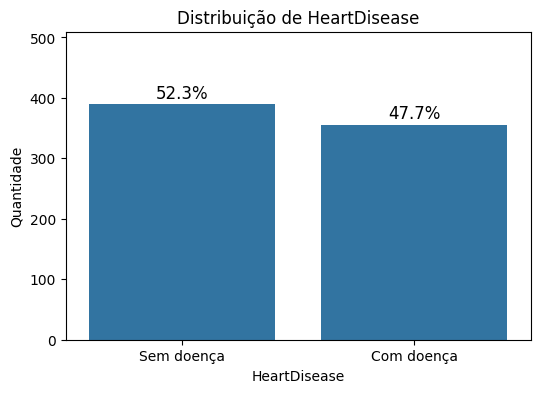

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='HeartDisease', data=df_heart_failure)
total = len(df_heart_failure)

for p in ax.patches:
  height = p.get_height()
  percentage = (height / total) * 100
  ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{percentage:.1f}%', ha="center", fontsize=12)

plt.title('Distribuição de HeartDisease')
plt.ylim(0, max(ax.get_ylim()) + 100)
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Sem doença', 'Com doença'])
plt.show()


Percebe-se que os dados estão balanceados

#### Variáveis numéricas

##### Estatisticas dos dados

In [ ]:
df_numericas.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##### Correlação e Dispersão

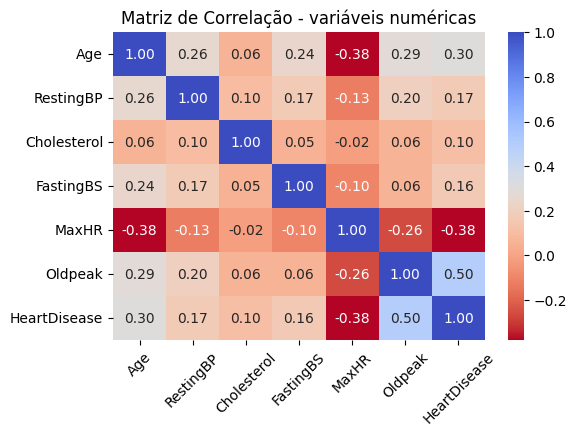

In [ ]:
correlation_matrix_num = df_numericas.corr()

# Plot da matriz de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_num, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Matriz de Correlação - variáveis numéricas')
plt.xticks(rotation=45)
plt.show()

Há uma moderada correlação negativa entre MaxHR e Age e MaxHR e Heart Disease. Isso sugere que à medida que a idade aumenta, a frequência cardíaca máxima tende a diminuir. Além disso, a correlação negativa entre MaxHR e a presença de doença cardíaca sugere que indivíduos com menor frequência cardíaca máxima têm maior probabilidade de ter doença cardíaca. Isso pode indicar que a capacidade cardiovascular reduzida está associada tanto ao envelhecimento quanto a condições cardíacas.

Percebe-se também uma correlação linear positiva moderada de 0.5 entre o Oldpeak e o Heart Disease. Isso sugere que valores mais altos de Oldpeak estão associados com uma maior probabilidade de presença de doença cardíaca, o que pode refletir um maior grau de comprometimento cardiovascular.

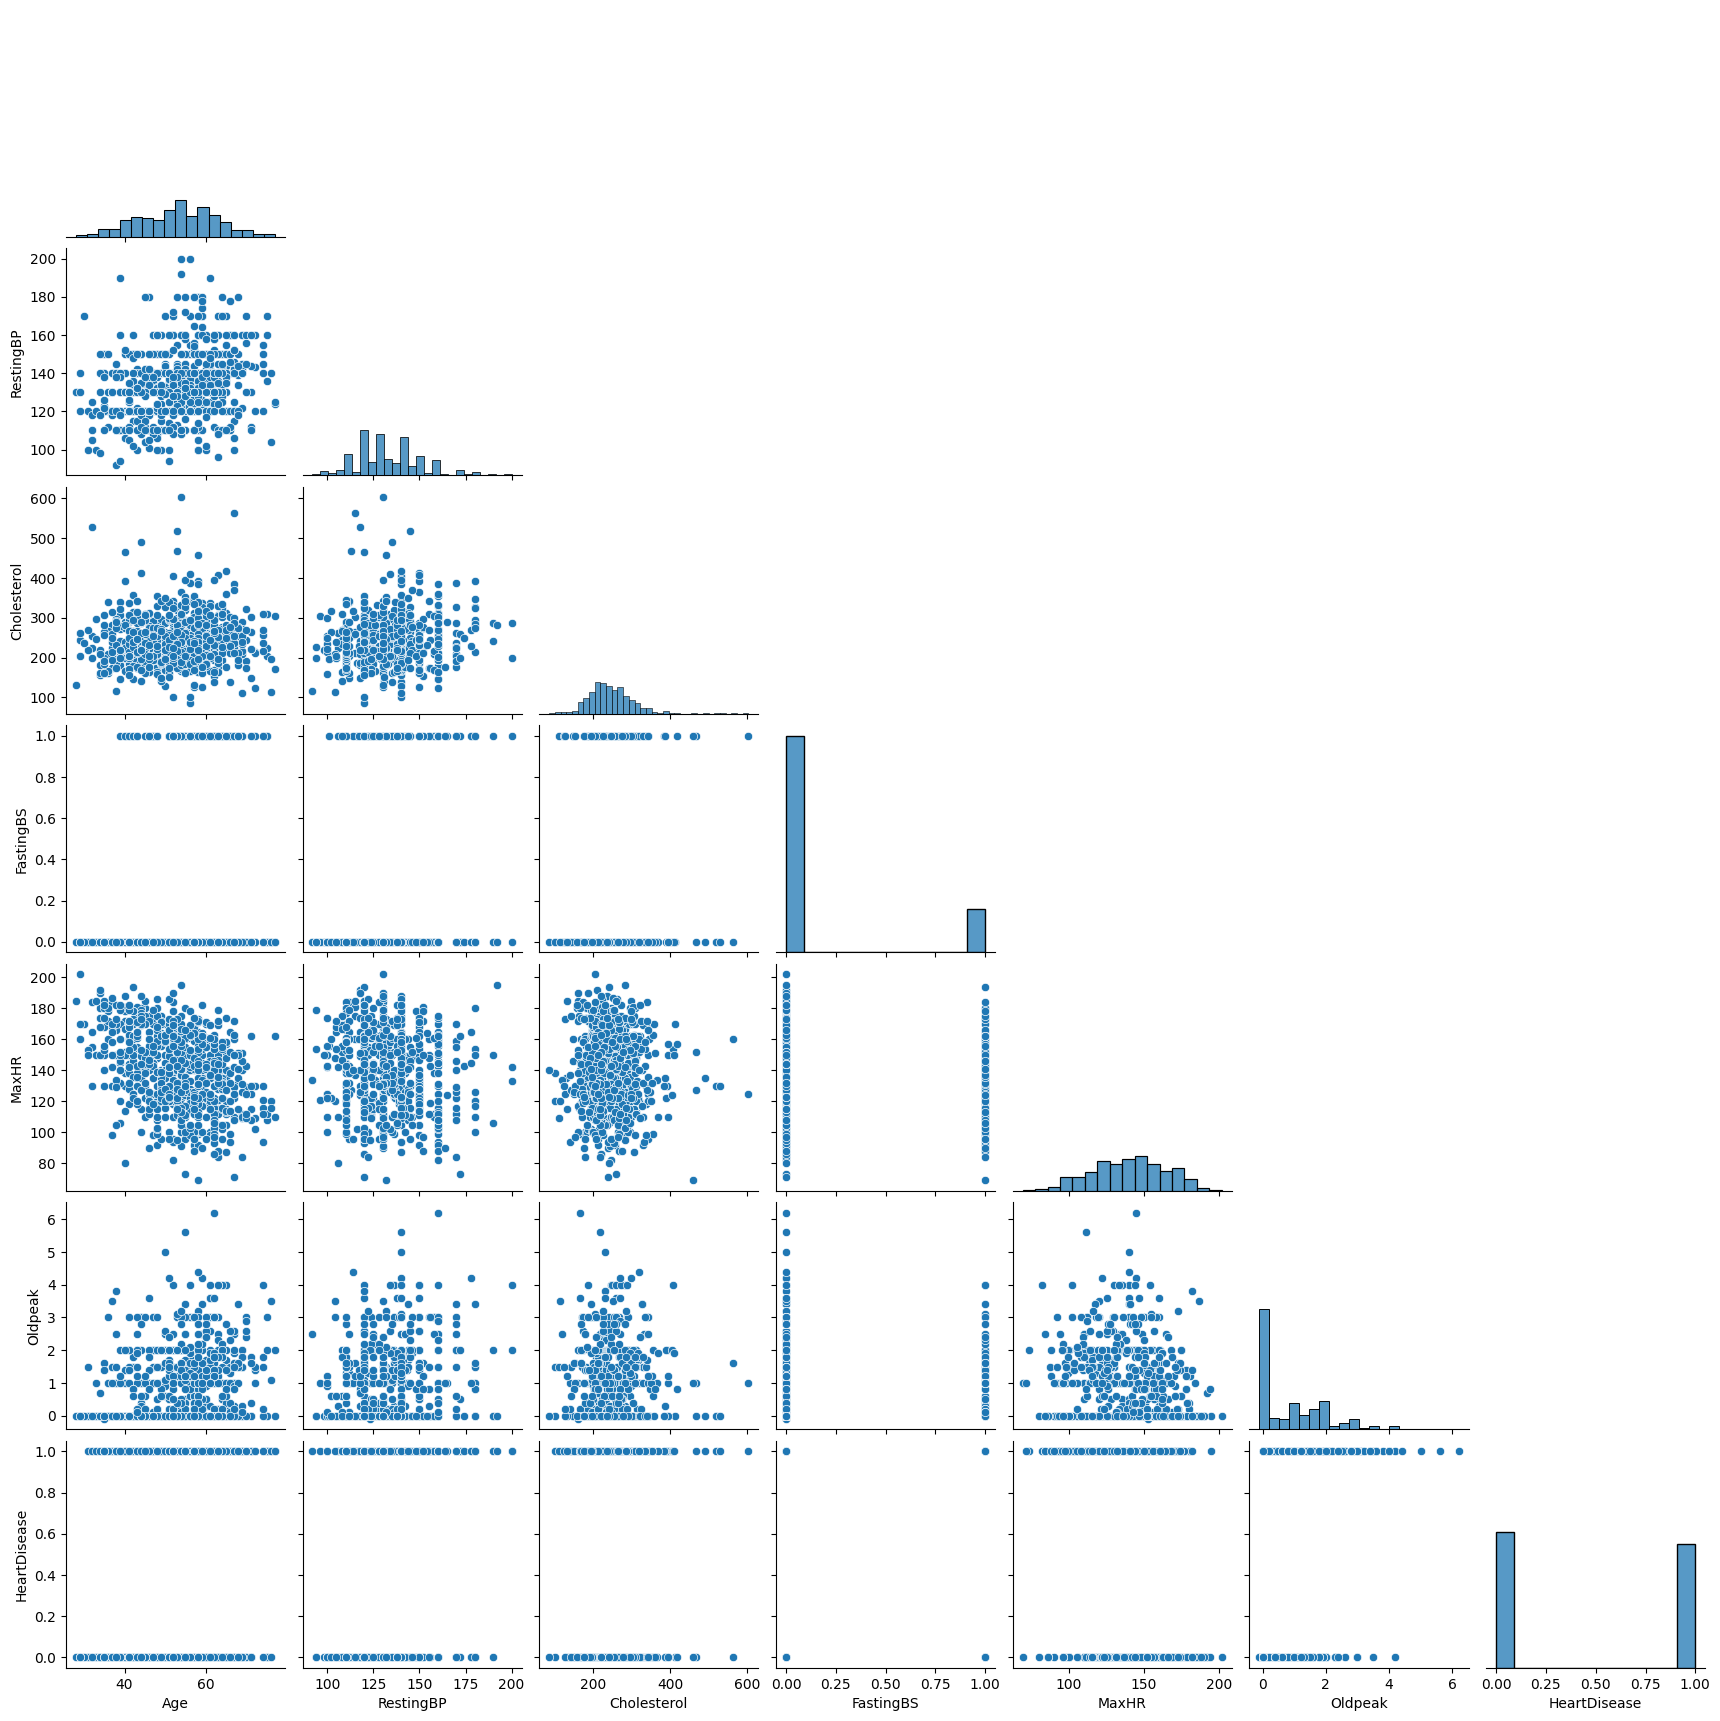

In [ ]:
sns.pairplot(df_numericas, diag_kind='hist', corner=True)
plt.show()

#### Variáveis Catergóricas

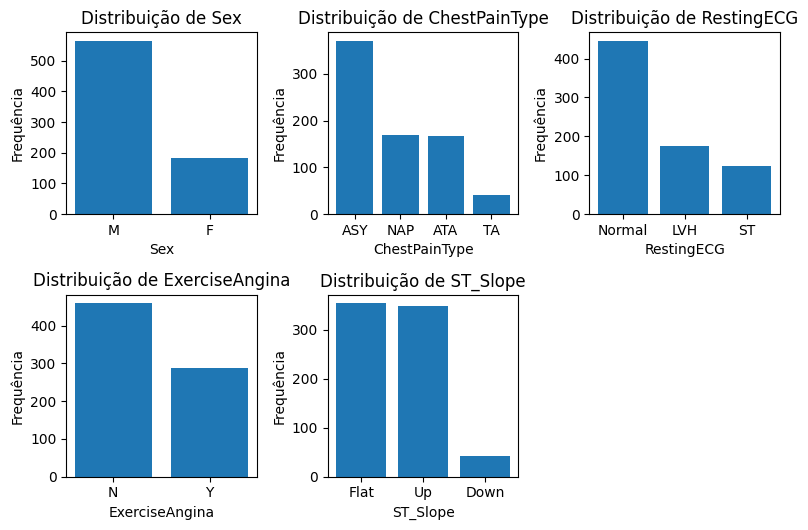

In [ ]:
categorical_cols = df_nao_numericas.select_dtypes(include='object').columns

num_plots = len(categorical_cols)
cols = 3
fig, axes = plt.subplots(nrows=(num_plots // cols) + (num_plots % cols > 0), ncols=cols, figsize=(8, 2.7 * ((num_plots // cols) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
  counts = df_nao_numericas[col].value_counts()
  axes[i].bar(counts.index, counts.values)
  axes[i].set_title(f"Distribuição de {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Frequência")
  axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Aplicação da Rede Neural Com Grid search




A aplicação da rede neural foi realizada utilizando a técnica de Grid Search para otimizar os parâmetros do modelo. O objetivo principal foi encontrar os melhores hiperparâmetros que minimizem a função de custo e maximizem a métrica de F1-Score, com foco em um modelo de classificação binária. A rede neural foi configurada de maneira flexível, permitindo a variação de parâmetros chave, tais como a taxa de aprendizado, o número de neurônios em cada camada oculta, o tipo de otimizador, o número de camadas ocultas, a quantidade de épocas e o tamanho do lote.

A arquitetura da rede MLP foi definida com uma camada de entrada contendo um número de neurônios igual ao número de features do conjunto de dados e ativação ReLU. Foram adicionadas de forma dinâmica múltiplas camadas ocultas, variando conforme os hiperparâmetros do Grid Search, e ativação ReLU, normalização em batch (Batch Normalization) e dropout de 20% para evitar overfitting. A camada de saída possui um único neurônio com ativação sigmoide para classificação binária. O modelo foi compilado utilizando a função de perda binary_crossentropy do keras e diferentes otimizadores (Adam ou RMSprop), ajustados com clipping para estabilidade no treinamento. Além disso, a métrica F1-Score foi utilizada para otimizar o desempenho da rede na predição de insuficiência cardíaca.

Dentro do espaço de busca, os seguintes parâmetros foram considerados:

Taxa de Aprendizado (learn_rate): Duas opções de taxa de aprendizado foram testadas, 0.001 e 0.01. A taxa de aprendizado é crucial para determinar o quanto os pesos da rede neural serão ajustados durante cada atualização, impactando diretamente na convergência do modelo.

Número de Neurônios por camada oculta (neurons_ocultos): a quantidade de neurônios em cada camada foi variado entre o número de características do conjunto de dados de entrada e o dobro desse valor. Isso permite explorar tanto modelos mais simples quanto mais complexos, ajustando a capacidade de representação da rede.

Otimizador (otimizador): O modelo foi avaliado com dois otimizadores distintos: Adam e RMSprop. O otimizador é responsável por atualizar os pesos da rede durante o treinamento. O Adam é amplamente utilizado por seu desempenho robusto e adaptabilidade, enquanto o RMSprop é um otimizador que ajusta a taxa de aprendizado com base em médias móveis de gradientes, o que pode ser útil em problemas mais difíceis.

Número de Camadas Ocultas (num_camadas_ocultas): O número de camadas ocultas foi ajustado entre 1, 2 e 3. Camadas adicionais podem permitir que o modelo capture padrões mais complexos nos dados, mas também podem aumentar o risco de sobreajuste se o número de camadas for excessivo.

Número de Épocas (epochs): O número de épocas foi variado entre 30 e 60, controlando o número de vezes que o modelo passaria pelos dados durante o treinamento. Mais épocas podem melhorar a convergência, mas também aumentam o risco de sobreajuste, o que foi mitigado pelo uso de EarlyStopping.

Tamanho do Lote (batch_size): Testaram-se dois tamanhos de lote, 32 e 64. O tamanho do lote influencia a estabilidade da atualização dos pesos e o tempo necessário para uma iteração do modelo. Tamanhos menores tendem a fornecer atualizações mais ruidosas, enquanto tamanhos maiores podem levar a uma convergência mais estável, mas com maior custo computacional.

Para garantir que o modelo fosse avaliado de maneira robusta, utilizou-se a técnica de Stratified K-Fold Cross-Validation, dividindo os dados em 3 partes, onde cada parte é utilizada como conjunto de validação uma vez e como parte do treinamento nas outras 2 vezes. Esse processo ajuda a garantir que o modelo seja avaliado de maneira imparcial, considerando diferentes subconjuntos dos dados.

Além disso, foi implementado o EarlyStopping, um mecanismo que monitora a função de perda durante o treinamento. Caso a perda não melhore após 5 épocas consecutivas, o treinamento é interrompido, e os melhores pesos obtidos até aquele momento são restaurados. Isso ajuda a evitar o sobreajuste e economiza tempo de treinamento.

Esse processo de busca exaustiva aumenta a chance de encontrar a configuração ideal, melhorando a performance geral do modelo na classificação dos dados.

#### Grid search

In [ ]:
def create_model(learn_rate=0.001, neurons=15, neurons_ocultos=15, activation_in = 'relu', activation_out = 'sigmoid', num_camadas_ocultas = 1, otimizador='Adam', dropout_rate=0.2):
  #o modelo será sequencial
  model = Sequential()

  #camada de entrada
  model.add(Dense(neurons, activation=activation_in, kernel_initializer = 'he_uniform', input_shape=(X_train.shape[1],))) #camada de entrada
  model.add(BatchNormalization())

  #usando 'for' para ser possível adicionar mais camadas ocultas
  for _ in range(num_camadas_ocultas):
    model.add(Dense(neurons_ocultos*2, activation=activation_in, kernel_initializer = 'he_uniform')) #camada oculta
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

  #camada de saída
  model.add(Dense(1, activation=activation_out))

  #definindo otimizador
  if otimizador == 'Adam':
    otimizador = Adam(learning_rate=learn_rate,  clipvalue = 0.5)
  elif otimizador == 'RMSprop':
    otimizador = RMSprop(learning_rate=learn_rate, clipvalue = 0.5)
  else:
    otimizador = Adam(learning_rate=learn_rate,  clipvalue = 0.5)

  #compilando com a função de custo, otimizador e métrica
  model.compile(
    loss = 'binary_crossentropy',
    optimizer = otimizador,
    metrics = [F1Score(average='macro', name='f1_score')]
  )

  model._estimator_type = "classifier"
  return model

In [ ]:
parametros = {
    'learn_rate': [0.001, 0.01]
    ,'neurons_ocultos': [X_test_scaled.shape[1], X_test_scaled.shape[1]*2]
    ,'otimizador': ['Adam', 'RMSprop']
    ,'num_camadas_ocultas': [1, 2, 3]
    ,'epochs': [30, 60]
    ,'batch_size': [32, 64]
}

#isso aqui é para passar no KerasClassifier, senão o gridsearch não consegue alterar dentro do create_model
default_params = {
    'learn_rate': 0.001,
    'neurons_ocultos': X_test_scaled.shape[1],
    'otimizador': 'Adam',
    'num_camadas_ocultas': 1,
    'epochs': 30,
    'batch_size': 32
}

kf = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
early_stop = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

#criando o modelo
model_grid_search = KerasClassifier(model=create_model, verbose=1, **default_params, callbacks=[early_stop])

#criando o grid search
grid_search = GridSearchCV(estimator=model_grid_search, param_grid=parametros, cv=kf, scoring='f1_macro', verbose=2)

#treinando o grid search
resultado_grid = grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - f1_score: 0.6609 - loss: 0.7974
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6714 - loss: 0.6986
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6739 - loss: 0.5912
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - f1_score: 0.6155 - loss: 0.5654
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - f1_score: 0.6141 - loss: 0.4815
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6438 - loss: 0.4562
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6283 - loss: 0.4448
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6615 - loss: 0.4607 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6133 - loss: 0.3896
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6547 - loss: 0.3883
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6467 - loss: 0.3868
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - f1_score: 0.6496 - loss: 0.9689
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6485 - loss: 0.7943 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6003 - loss: 0.6922 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6684 - loss: 0.6485 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6537 - loss: 0.5912 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6314 - loss: 0.5590 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6430 - loss: 0.5904 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6141 - loss: 0.5444 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6399 - loss: 0.5683 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6029 - loss: 0.5472 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6398 - loss: 0.5557 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6788 - loss: 0.8084
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6855 - loss: 0.6798 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6688 - loss: 0.5746 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6409 - loss: 0.5383 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6812 - loss: 0.5277 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6188 - loss: 0.5382 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6798 - loss: 0.4657 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6363 - loss: 0.4942 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6720 - loss: 0.4613 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6154 - loss: 0.4587 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6662 - loss: 0.4424 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6354 - los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, learn_rate=0.001, neurons_ocultos=15, num_camadas_ocultas=1, otimizador=Adam; total time=   7.5s
Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.6201 - loss: 0.8981
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6440 - loss: 0.7501 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6365 - loss: 0.6945 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6410 - loss: 0.6393 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6278 - loss: 0.5895 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6452 - loss: 0.5629 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6319 - loss: 0.4989 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6595 - loss: 0.4809 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6496 - loss: 0.4826 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6585 - loss: 0.4631 
Epoch 11/30
11/11 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, learn_rate=0.001, neurons_ocultos=15, num_camadas_ocultas=1, otimizador=RMSprop; total time=   6.6s
Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.6763 - loss: 1.0425
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.5973 - loss: 0.8663 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6218 - loss: 0.8257 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6486 - loss: 0.6776 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6380 - loss: 0.6388 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5890 - loss: 0.6578 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6362 - loss: 0.5274 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6496 - loss: 0.5220 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6430 - loss: 0.5540 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6417 - loss: 0.4666 
Epoch 11/30
11/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6251 - loss: 0.6564
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6488 - loss: 0.5559 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6359 - loss: 0.4524 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6273 - loss: 0.4269 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6391 - loss: 0.4429 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6111 - loss: 0.4238 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6316 - loss: 0.4193 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6489 - loss: 0.4178 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6602 - loss: 0.3533 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6665 - loss: 0.4084 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6208 - loss: 0.4270 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6351 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_score: 0.6597 - loss: 1.2083
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6399 - loss: 0.9152 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6631 - loss: 0.8482 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6378 - loss: 0.6429 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6670 - loss: 0.6456 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6596 - loss: 0.5572 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6387 - loss: 0.6346 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6501 - loss: 0.5398 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6477 - loss: 0.5151 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6271 - loss: 0.5480 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6300 - loss: 0.4751 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - f1_score: 0.6394 - loss: 0.6407 
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6578 - loss: 0.6971 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6602 - loss: 0.6536 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6310 - loss: 0.4784 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6709 - loss: 0.4906 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6223 - loss: 0.5672 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6097 - loss: 0.4596 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6520 - loss: 0.3923 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6431 - loss: 0.4214
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6496 - loss: 0.4323 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6681 - loss: 0.5165 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6349 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_score: 0.6271 - loss: 1.0448
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6497 - loss: 0.8261 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6039 - loss: 0.7006 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6308 - loss: 0.6301 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6625 - loss: 0.6317 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6423 - loss: 0.5674 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6503 - loss: 0.5153
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6654 - loss: 0.4842 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6580 - loss: 0.6099 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6253 - loss: 0.5453 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6331 - loss: 0.5481 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6370 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6000 - loss: 0.9477
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6444 - loss: 0.7938 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6554 - loss: 0.7004 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6718 - loss: 0.6381 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6327 - loss: 0.6134 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6534 - loss: 0.5410 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6687 - loss: 0.4790 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6315 - loss: 0.4810 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6390 - loss: 0.4343 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6272 - loss: 0.4766 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6281 - loss: 0.4148 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6225 - loss: 0.8657
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6574 - loss: 0.7523 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6596 - loss: 0.6297 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6364 - loss: 0.5885 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6317 - loss: 0.5206 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6503 - loss: 0.5272 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6109 - loss: 0.4970 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6600 - loss: 0.5240 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6252 - loss: 0.4841 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6120 - loss: 0.4237 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6229 - loss: 0.4520 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6738 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6593 - loss: 0.7498
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6504 - loss: 0.6462 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6797 - loss: 0.5818 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6549 - loss: 0.5985 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6584 - loss: 0.4872 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6345 - loss: 0.4439 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6723 - loss: 0.4250 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6709 - loss: 0.4469 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6452 - loss: 0.4176 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6399 - loss: 0.4224 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6372 - loss: 0.4190 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6807 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.6466 - loss: 0.9253
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6476 - loss: 0.8182
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6448 - loss: 0.6406  
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6666 - loss: 0.5877 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6167 - loss: 0.5692 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6825 - loss: 0.4840 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6403 - loss: 0.5100 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6382 - loss: 0.4515 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6270 - loss: 0.4715 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6359 - loss: 0.4426 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6624 - loss: 0.4241 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6600 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - f1_score: 0.6608 - loss: 0.7695 
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6115 - loss: 0.6743
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_score: 0.6427 - loss: 0.6283
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6238 - loss: 0.5871
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6615 - loss: 0.5209
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6658 - loss: 0.4964
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6519 - loss: 0.4530
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6777 - loss: 0.5430
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6632 - loss: 0.4620
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6498 - loss: 0.4728
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6671 - loss: 0.4466
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6461 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6702 - loss: 0.7734
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6417 - loss: 0.6987 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6332 - loss: 0.6139 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6430 - loss: 0.6069 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6672 - loss: 0.5600 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6424 - loss: 0.4981 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6496 - loss: 0.5089
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6458 - loss: 0.4838 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6420 - loss: 0.4712 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6151 - loss: 0.4491 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6797 - loss: 0.5054 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6557 - loss: 0.9721
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6569 - loss: 0.7785 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6450 - loss: 0.6366
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6450 - loss: 0.6669 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6599 - loss: 0.5968 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6716 - loss: 0.5824 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6696 - loss: 0.5423 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6536 - loss: 0.4517 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6309 - loss: 0.5249 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6368 - loss: 0.5122 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6497 - loss: 0.4778 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6386 - loss: 0.7480
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6162 - loss: 0.5992 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6441 - loss: 0.5942
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6151 - loss: 0.5801
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6466 - loss: 0.5059
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6491 - loss: 0.4936
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6488 - loss: 0.4366
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6367 - loss: 0.4749
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6262 - loss: 0.4642
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6318 - loss: 0.4390
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6724 - loss: 0.4679  
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6600 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6483 - loss: 0.9011
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6635 - loss: 0.7848 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6460 - loss: 0.8037 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6673 - loss: 0.6516 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6768 - loss: 0.6390 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6612 - loss: 0.6270 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6171 - loss: 0.5598 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6427 - loss: 0.5743 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5892 - loss: 0.4770 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5998 - loss: 0.5756 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6633 - loss: 0.5287 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6401 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6629 - loss: 0.8151
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6176 - loss: 0.6150 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6060 - loss: 0.6359 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6727 - loss: 0.5128 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6644 - loss: 0.4632 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6591 - loss: 0.4431 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.5947 - loss: 0.4702 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6356 - loss: 0.4199 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6381 - loss: 0.4126 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6301 - loss: 0.3802 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6339 - loss: 0.3697 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6929 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6642 - loss: 0.7866
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6207 - loss: 0.6060 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6475 - loss: 0.5677 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6320 - loss: 0.5413 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6247 - loss: 0.4808 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6358 - loss: 0.4434 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6244 - loss: 0.4250 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6368 - loss: 0.4141 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6328 - loss: 0.4459 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6321 - loss: 0.4082 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6492 - loss: 0.4055 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6487 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6638 - loss: 0.5966
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6797 - loss: 0.5193 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6488 - loss: 0.4742 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6556 - loss: 0.4116 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6255 - loss: 0.4144 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6178 - loss: 0.3956 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6592 - loss: 0.3866 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6389 - loss: 0.4093 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6599 - loss: 0.3226 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6528 - loss: 0.3347 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6592 - loss: 0.3961 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6506 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6625 - loss: 0.9907
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6387 - loss: 0.7569 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6466 - loss: 0.6812 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6270 - loss: 0.5983 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6471 - loss: 0.5819 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6649 - loss: 0.5762 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6428 - loss: 0.5149
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6363 - loss: 0.5080
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6617 - loss: 0.4625 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6707 - loss: 0.4254 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6510 - loss: 0.4217 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6893 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - f1_score: 0.6140 - loss: 0.9095
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6568 - loss: 0.6854 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6625 - loss: 0.6020 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6646 - loss: 0.5210 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6595 - loss: 0.5003 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6600 - loss: 0.5005 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6514 - loss: 0.4482
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6495 - loss: 0.4774  
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6255 - loss: 0.4456 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6738 - loss: 0.4213
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6558 - loss: 0.4201 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6838 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6269 - loss: 0.6441
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6324 - loss: 0.5896 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6707 - loss: 0.4795 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6495 - loss: 0.4794 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6662 - loss: 0.4482 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6242 - loss: 0.5061 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6271 - loss: 0.4109
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6393 - loss: 0.3544 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6472 - loss: 0.3874 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6463 - loss: 0.4098 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6693 - loss: 0.4011 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6311 - loss: 0.7890
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6537 - loss: 0.6037 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6734 - loss: 0.5103 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6537 - loss: 0.4773 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6009 - loss: 0.4426 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6539 - loss: 0.3563 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.5763 - loss: 0.4130
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6373 - loss: 0.3888
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6752 - loss: 0.3710
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6340 - loss: 0.3557
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6233 - loss: 0.3307
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6731 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6080 - loss: 0.8064
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6326 - loss: 0.6184 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6437 - loss: 0.5363 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6392 - loss: 0.4377
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6325 - loss: 0.4802 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6301 - loss: 0.4636 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6595 - loss: 0.4177 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6289 - loss: 0.4144 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6637 - loss: 0.3691
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6594 - loss: 0.4284 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6364 - loss: 0.4298 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6269 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6618 - loss: 0.9824
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6404 - loss: 0.7567 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6522 - loss: 0.5841 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6136 - loss: 0.5122 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6267 - loss: 0.5267 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6489 - loss: 0.5143 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6243 - loss: 0.4689 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6498 - loss: 0.4180 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6278 - loss: 0.3601 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6691 - loss: 0.4249 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6590 - loss: 0.3833 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6200 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6312 - loss: 0.7090
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6581 - loss: 0.5235 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6434 - loss: 0.4606 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6266 - loss: 0.4293 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6772 - loss: 0.4164 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6873 - loss: 0.4178 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6400 - loss: 0.2960 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6259 - loss: 0.3877 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6525 - loss: 0.3163 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6496 - loss: 0.2975 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6743 - loss: 0.3294 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6636 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6446 - loss: 0.7414
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6457 - loss: 0.5531 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6618 - loss: 0.4854 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6311 - loss: 0.5771 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6683 - loss: 0.4551 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6291 - loss: 0.4073 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6410 - loss: 0.4595 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6660 - loss: 0.4855 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6458 - loss: 0.3969 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6165 - loss: 0.3893 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6411 - loss: 0.4453 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6552 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - f1_score: 0.6723 - loss: 0.7320
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6167 - loss: 0.6482 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6509 - loss: 0.4848 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6414 - loss: 0.4622
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6452 - loss: 0.5008 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6788 - loss: 0.4567 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6153 - loss: 0.3861 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6423 - loss: 0.3937 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6376 - loss: 0.3996 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6163 - loss: 0.4138
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6687 - loss: 0.3549 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6510 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6662 - loss: 1.0380
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6722 - loss: 0.6206 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6430 - loss: 0.4918 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6283 - loss: 0.4869 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6415 - loss: 0.4064 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6564 - loss: 0.3668 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6352 - loss: 0.3729
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6488 - loss: 0.4891
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6240 - loss: 0.4340
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6589 - loss: 0.3821
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6438 - loss: 0.4250
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6295 - loss: 0.9317
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6569 - loss: 0.6658 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6249 - loss: 0.5815 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6416 - loss: 0.4772 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6284 - loss: 0.4577 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6462 - loss: 0.4676 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6225 - loss: 0.4222 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6266 - loss: 0.4177 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6725 - loss: 0.3583 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6646 - loss: 0.4010
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6474 - loss: 0.3954 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6616 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - f1_score: 0.6241 - loss: 0.8452
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6662 - loss: 0.6402 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6637 - loss: 0.5655 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6362 - loss: 0.4682 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6747 - loss: 0.5115 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6544 - loss: 0.4726 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6724 - loss: 0.5108 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6177 - loss: 0.5078
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6499 - loss: 0.4411 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6521 - loss: 0.4427
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6405 - loss: 0.3843 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6435 - loss: 0.7728
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6406 - loss: 0.6602
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6371 - loss: 0.5606
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6242 - loss: 0.5571
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6644 - loss: 0.4714
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6325 - loss: 0.4757
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6432 - loss: 0.4862
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6489 - loss: 0.4338  
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6348 - loss: 0.4654 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6774 - loss: 0.4268 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6259 - loss: 0.3811 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6608 - loss: 0.9540
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6225 - loss: 0.6348 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6194 - loss: 0.5768 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6225 - loss: 0.5390 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6216 - loss: 0.5686 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6740 - loss: 0.4661 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6500 - loss: 0.4601 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6330 - loss: 0.4846 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6532 - loss: 0.4089 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6246 - loss: 0.4058 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6402 - loss: 0.5130 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6903 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6853 - loss: 0.8184
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6331 - loss: 0.5853  
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6397 - loss: 0.5921
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6357 - loss: 0.4945 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6675 - loss: 0.6021 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6504 - loss: 0.5100 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6368 - loss: 0.4536 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6628 - loss: 0.4254 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6182 - loss: 0.4555 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6515 - loss: 0.3719 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6453 - loss: 0.4343 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6637 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6374 - loss: 0.6319
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6387 - loss: 0.3522 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6616 - loss: 0.3437 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6504 - loss: 0.3158 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6645 - loss: 0.3024 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6677 - loss: 0.2721 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6056 - loss: 0.3071 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6609 - loss: 0.2099 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6218 - loss: 0.2289 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6264 - loss: 0.2350 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6963 - loss: 0.2498 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6454 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6591 - loss: 0.7060
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6445 - loss: 0.4547 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6378 - loss: 0.3553 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6482 - loss: 0.3423 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6107 - loss: 0.3139 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6305 - loss: 0.3640 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6514 - loss: 0.3066 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6805 - loss: 0.3215 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6390 - loss: 0.2985 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6178 - loss: 0.3112 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6435 - loss: 0.2928 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6213 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_score: 0.6290 - loss: 0.7198
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6576 - loss: 0.4830 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.7108 - loss: 0.4374 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6126 - loss: 0.3797 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6603 - loss: 0.3158 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6456 - loss: 0.3214 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6713 - loss: 0.2508 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6469 - loss: 0.2899
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6005 - loss: 0.2417
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6562 - loss: 0.2236
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6569 - loss: 0.2697
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6651 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6610 - loss: 0.6419
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6206 - loss: 0.3247 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6354 - loss: 0.3489 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6295 - loss: 0.2971 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6566 - loss: 0.2385 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6584 - loss: 0.2531 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6362 - loss: 0.2708 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6492 - loss: 0.2260 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6645 - loss: 0.2261 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6553 - loss: 0.2138 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6220 - loss: 0.1801 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6828 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6468 - loss: 0.6500
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6584 - loss: 0.3943 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6344 - loss: 0.3489
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6269 - loss: 0.3684
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6594 - loss: 0.3758
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6034 - loss: 0.3844  
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6646 - loss: 0.2909 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6228 - loss: 0.2955 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6505 - loss: 0.3185 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6266 - loss: 0.3112  
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6417 - loss: 0.3636 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6056 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6636 - loss: 0.5998
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6637 - loss: 0.3756 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6662 - loss: 0.3663 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6533 - loss: 0.3010
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6520 - loss: 0.2590 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6580 - loss: 0.2381 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6506 - loss: 0.3034 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6627 - loss: 0.2711 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6164 - loss: 0.3092 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6426 - loss: 0.2549 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6448 - loss: 0.2281 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6456 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6316 - loss: 0.6563
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6597 - loss: 0.4126 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6260 - loss: 0.3893 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6354 - loss: 0.2774 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6273 - loss: 0.3201 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6549 - loss: 0.2706 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6935 - loss: 0.2952 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6644 - loss: 0.2697 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6325 - loss: 0.2402 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5994 - loss: 0.2304 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6339 - loss: 0.2910 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6625 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6616 - loss: 0.6548
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6358 - loss: 0.4064 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6156 - loss: 0.3768 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6405 - loss: 0.3763 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6824 - loss: 0.3870 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6481 - loss: 0.2831 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6310 - loss: 0.3215 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6634 - loss: 0.3248 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6714 - loss: 0.3717 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6562 - loss: 0.2734 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6207 - loss: 0.3222 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6179 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6359 - loss: 0.7734
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6572 - loss: 0.4613 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6259 - loss: 0.4436
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6659 - loss: 0.3551 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6468 - loss: 0.3442 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6717 - loss: 0.3054 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6660 - loss: 0.2433 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6684 - loss: 0.2658 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6629 - loss: 0.2851 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6325 - loss: 0.2696 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6544 - loss: 0.2332
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6556 - loss: 0.6787
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6628 - loss: 0.4089 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6103 - loss: 0.3757 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6649 - loss: 0.3234 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6420 - loss: 0.2478 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6574 - loss: 0.2817 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6371 - loss: 0.2215 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6492 - loss: 0.2746
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6580 - loss: 0.3015
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6599 - loss: 0.2239
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6186 - loss: 0.2568
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6370 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6179 - loss: 0.6812
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6852 - loss: 0.4702 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6828 - loss: 0.4490 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6582 - loss: 0.3768 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6401 - loss: 0.3370 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6601 - loss: 0.3198 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6403 - loss: 0.2956 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6317 - loss: 0.3047 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6611 - loss: 0.3025 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6134 - loss: 0.3081 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5976 - loss: 0.3306 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6295 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - f1_score: 0.6279 - loss: 0.5990
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6118 - loss: 0.4060
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6498 - loss: 0.3241
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6446 - loss: 0.3272
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6527 - loss: 0.2671  
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6591 - loss: 0.2787 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6806 - loss: 0.3785 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6572 - loss: 0.2614
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6367 - loss: 0.2526
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6431 - loss: 0.2994  
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6893 - loss: 0.2766
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6490 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6523 - loss: 0.7964
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6647 - loss: 0.5340 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6541 - loss: 0.4481 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6809 - loss: 0.3872 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6591 - loss: 0.3007 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6580 - loss: 0.3088 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6320 - loss: 0.3466 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6602 - loss: 0.3118 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6512 - loss: 0.2761 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6756 - loss: 0.2887 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6506 - loss: 0.2889 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.6071 - loss: 0.8502
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6339 - loss: 0.5621 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5582 - loss: 0.4913 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6640 - loss: 0.4114 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6103 - loss: 0.3654 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6716 - loss: 0.4127 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6516 - loss: 0.3616 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6710 - loss: 0.3160 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6282 - loss: 0.3589 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6449 - loss: 0.3148 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6408 - loss: 0.3212 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - f1_score: 0.6442 - loss: 0.7862 
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6641 - loss: 0.5049 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6653 - loss: 0.4374 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6464 - loss: 0.4613 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6518 - loss: 0.3463 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6100 - loss: 0.3553 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6397 - loss: 0.2943 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5997 - loss: 0.3961 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6302 - loss: 0.2944 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6489 - loss: 0.2780 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6622 - loss: 0.2659 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6465 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6257 - loss: 0.6255
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6425 - loss: 0.4700
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6334 - loss: 0.3489
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6321 - loss: 0.3363
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6191 - loss: 0.3139
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6443 - loss: 0.3041
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6129 - loss: 0.2711
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6473 - loss: 0.2543
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6620 - loss: 0.2652  
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6278 - loss: 0.2422 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6367 - loss: 0.2139 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6522 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6527 - loss: 0.7450
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6381 - loss: 0.4992 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6273 - loss: 0.3725 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6356 - loss: 0.3492 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6509 - loss: 0.3674 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6599 - loss: 0.4219 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6394 - loss: 0.4547 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6703 - loss: 0.3931 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6614 - loss: 0.3981
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6424 - loss: 0.3281 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6412 - loss: 0.3283 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6533 - loss: 0.6484
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6613 - loss: 0.4578
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6240 - loss: 0.4334  
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6572 - loss: 0.3254 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6792 - loss: 0.3294 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6341 - loss: 0.3465 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6401 - loss: 0.3229 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6194 - loss: 0.3544 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6252 - loss: 0.2504 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6483 - loss: 0.2690 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6477 - loss: 0.2182 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6876 - loss: 0.8023
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6715 - loss: 0.3470 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6686 - loss: 0.2762 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6569 - loss: 0.3267 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6162 - loss: 0.2526 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6610 - loss: 0.2679 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6325 - loss: 0.2471 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6415 - loss: 0.2656 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6297 - loss: 0.2136 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6701 - loss: 0.2413 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6618 - loss: 0.2165 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6107 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6325 - loss: 0.6071
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6276 - loss: 0.4423 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6227 - loss: 0.3700
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6400 - loss: 0.3223 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6844 - loss: 0.3685 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6654 - loss: 0.2791 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6462 - loss: 0.2587 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6494 - loss: 0.3090 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6746 - loss: 0.2841 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6374 - loss: 0.2455 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6444 - loss: 0.2628 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6355 - loss: 0.5823
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6063 - loss: 0.3861 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6217 - loss: 0.2680 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6508 - loss: 0.2561 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6464 - loss: 0.2867 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6359 - loss: 0.2382 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6529 - loss: 0.2433 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6600 - loss: 0.2716 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6806 - loss: 0.2545 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6479 - loss: 0.2216 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6371 - loss: 0.2097 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6317 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6475 - loss: 0.6378
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6443 - loss: 0.3513 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6762 - loss: 0.3021 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6402 - loss: 0.3223 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6461 - loss: 0.2933 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6308 - loss: 0.2785 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6241 - loss: 0.2366 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6016 - loss: 0.2998 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6635 - loss: 0.1905 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6372 - loss: 0.2661 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6712 - loss: 0.1842 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6520 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6808 - loss: 0.6751
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6044 - loss: 0.4406 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6186 - loss: 0.3985 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6509 - loss: 0.3576 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6419 - loss: 0.3795 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6233 - loss: 0.3596 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6336 - loss: 0.2972 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6505 - loss: 0.2653 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6612 - loss: 0.3477 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6623 - loss: 0.2835 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6482 - loss: 0.2756 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6613 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6595 - loss: 0.7421
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6243 - loss: 0.3039 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6355 - loss: 0.3029 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6338 - loss: 0.2871 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6177 - loss: 0.2569 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6263 - loss: 0.2979 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6404 - loss: 0.2330 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6691 - loss: 0.1935 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6436 - loss: 0.1970 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6657 - loss: 0.1624 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6374 - loss: 0.2293 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6528 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - f1_score: 0.6605 - loss: 0.6487
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6535 - loss: 0.3920
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6483 - loss: 0.2821
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6452 - loss: 0.2944
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6684 - loss: 0.3006  
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6261 - loss: 0.2796 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6346 - loss: 0.2118 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6485 - loss: 0.2558 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6708 - loss: 0.2120 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6575 - loss: 0.2016 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6628 - loss: 0.1941 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6183 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6525 - loss: 0.7101
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6318 - loss: 0.4308
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6219 - loss: 0.3630 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6683 - loss: 0.3407 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6229 - loss: 0.3132 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6522 - loss: 0.2832 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6617 - loss: 0.2959 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6328 - loss: 0.3051 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6440 - loss: 0.2328 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6540 - loss: 0.2944 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6330 - loss: 0.2786 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6815 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6193 - loss: 0.5866
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6457 - loss: 0.2949 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6430 - loss: 0.3752 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6304 - loss: 0.2839 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6322 - loss: 0.3122 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6535 - loss: 0.2441 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6699 - loss: 0.2964 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6668 - loss: 0.2580 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6058 - loss: 0.2546 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6757 - loss: 0.2071 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6808 - loss: 0.2123 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6621 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6303 - loss: 0.6753
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6395 - loss: 0.3693 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6208 - loss: 0.3456 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6555 - loss: 0.3912 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6359 - loss: 0.2767 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6475 - loss: 0.2929 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6701 - loss: 0.2427 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6169 - loss: 0.2402 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6126 - loss: 0.2165 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6399 - loss: 0.2102 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6659 - loss: 0.1858 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6573 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6544 - loss: 0.5901
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6333 - loss: 0.3608 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6581 - loss: 0.3357 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6617 - loss: 0.3573 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6340 - loss: 0.2891 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6349 - loss: 0.3138 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6693 - loss: 0.3068 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6559 - loss: 0.2792 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6372 - loss: 0.2886 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6817 - loss: 0.2592 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6585 - loss: 0.2479 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6538 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - f1_score: 0.6537 - loss: 0.6426
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6559 - loss: 0.3896 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6360 - loss: 0.3272 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6893 - loss: 0.4236
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6880 - loss: 0.2722
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6639 - loss: 0.2290
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6539 - loss: 0.3003
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6448 - loss: 0.2669
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6288 - loss: 0.2046  
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6165 - loss: 0.2372
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6007 - loss: 0.2201
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6273 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - f1_score: 0.6314 - loss: 0.6246
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6426 - loss: 0.4302
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6515 - loss: 0.3392
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6321 - loss: 0.3561
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6395 - loss: 0.2724
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6334 - loss: 0.3156
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6358 - loss: 0.2248 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6500 - loss: 0.2660
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6422 - loss: 0.2488
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6744 - loss: 0.2039
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6314 - loss: 0.2033
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.650

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - f1_score: 0.6437 - loss: 0.7413
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6165 - loss: 0.4446 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6490 - loss: 0.3848 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6077 - loss: 0.4411
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6666 - loss: 0.3501
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6643 - loss: 0.3510
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6530 - loss: 0.2644 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6382 - loss: 0.3159 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6548 - loss: 0.2736
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6446 - loss: 0.3343
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6415 - loss: 0.2807
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6461

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - f1_score: 0.6385 - loss: 0.6397
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5914 - loss: 0.4651  
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6067 - loss: 0.3400 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6666 - loss: 0.3722
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6397 - loss: 0.2897 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6629 - loss: 0.2420
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6402 - loss: 0.2785 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6561 - loss: 0.2935 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6202 - loss: 0.2795 
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6665 - loss: 0.2267
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6706 - loss: 0.2063
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - f1_score: 0.6413 - loss: 0.6802
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6111 - loss: 0.4797
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6565 - loss: 0.3426
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6560 - loss: 0.3858
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6414 - loss: 0.2603
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6362 - loss: 0.2916
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6376 - loss: 0.2847
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6556 - loss: 0.2611
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6566 - loss: 0.2834
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6442 - loss: 0.2615
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6579 - loss: 0.2298
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6668 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - f1_score: 0.6222 - loss: 0.6590 
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6603 - loss: 0.4173 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6310 - loss: 0.3221 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6449 - loss: 0.3486 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6237 - loss: 0.3894 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6628 - loss: 0.3289 
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6498 - loss: 0.2873 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6494 - loss: 0.3239 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6298 - loss: 0.2866
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6491 - loss: 0.3688
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6199 - loss: 0.2516 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - f1_score: 0.6497 - loss: 0.6334
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6474 - loss: 0.4021 
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6639 - loss: 0.3669 
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6527 - loss: 0.2916 
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6416 - loss: 0.2929 
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6070 - loss: 0.2771
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6743 - loss: 0.2700 
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6568 - loss: 0.2928 
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6424 - loss: 0.2736
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6207 - loss: 0.2699 
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6710 - loss: 0.1880 
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6803 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6407 - loss: 0.9274
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6795 - loss: 0.7352 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6196 - loss: 0.6924 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6523 - loss: 0.6601 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6574 - loss: 0.5752 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6486 - loss: 0.5413 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6691 - loss: 0.5125 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6414 - loss: 0.5335 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6405 - loss: 0.5257 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6629 - loss: 0.4328 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6363 - loss: 0.5401 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6777 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6231 - loss: 0.7268
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6406 - loss: 0.7333 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6349 - loss: 0.5035 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6711 - loss: 0.5430 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6350 - loss: 0.5051 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6517 - loss: 0.5172 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6256 - loss: 0.5046 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6136 - loss: 0.4663 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6352 - loss: 0.4268 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6493 - loss: 0.4706 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6577 - loss: 0.4327 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6057 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6432 - loss: 1.2900
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6763 - loss: 1.0750 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6357 - loss: 0.9508 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6267 - loss: 0.8156 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6779 - loss: 0.7063 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6166 - loss: 0.6965
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6519 - loss: 0.6238 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6361 - loss: 0.5560 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6562 - loss: 0.5894 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6451 - loss: 0.5107 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6411 - loss: 0.4880 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6260 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6466 - loss: 1.0125
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6659 - loss: 0.8563 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6828 - loss: 0.7723 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6385 - loss: 0.6306 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6512 - loss: 0.6233 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6207 - loss: 0.5737 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6341 - loss: 0.5085 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6374 - loss: 0.5148 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6446 - loss: 0.4689 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6408 - loss: 0.4438 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6431 - loss: 0.4340 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6700 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6423 - loss: 0.8169
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6486 - loss: 0.7480 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6435 - loss: 0.5893 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6438 - loss: 0.5636 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6300 - loss: 0.5791
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6150 - loss: 0.4716
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6507 - loss: 0.4347
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6483 - loss: 0.4438
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6601 - loss: 0.4418
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6542 - loss: 0.4278 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6421 - loss: 0.4365 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6723 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6843 - loss: 0.9104
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6024 - loss: 0.8106 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6616 - loss: 0.6779 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6401 - loss: 0.6348 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6105 - loss: 0.5443 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6505 - loss: 0.4972 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6480 - loss: 0.4785 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6382 - loss: 0.4613 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6327 - loss: 0.4363 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6418 - loss: 0.4036 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6615 - loss: 0.4071 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6003 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6349 - loss: 0.8247
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6578 - loss: 0.6317 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6471 - loss: 0.6641 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6543 - loss: 0.5882 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6438 - loss: 0.5727 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6200 - loss: 0.4951 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6119 - loss: 0.4826 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6673 - loss: 0.5837 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6527 - loss: 0.4841 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6694 - loss: 0.4795 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6683 - loss: 0.4147 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6502 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_score: 0.6424 - loss: 1.1225
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6284 - loss: 0.8514 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6334 - loss: 0.6694
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6116 - loss: 0.6642 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6674 - loss: 0.5882 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5979 - loss: 0.5757 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6228 - loss: 0.5590 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6360 - loss: 0.5193 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6320 - loss: 0.4836 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6443 - loss: 0.5396 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6754 - loss: 0.4962 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - f1_score: 0.6513 - loss: 1.1738
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6351 - loss: 0.9652 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6457 - loss: 0.8730 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6143 - loss: 0.7820 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6547 - loss: 0.7041 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6933 - loss: 0.6403
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6395 - loss: 0.6091 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6233 - loss: 0.5900 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6466 - loss: 0.5796 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6516 - loss: 0.5308 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6604 - loss: 0.5235 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6143 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - f1_score: 0.6459 - loss: 0.7865 
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6497 - loss: 0.6748
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6405 - loss: 0.6490 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6519 - loss: 0.5744 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6938 - loss: 0.5702 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6742 - loss: 0.4845 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6358 - loss: 0.5221 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6485 - loss: 0.4652 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6403 - loss: 0.4617 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6351 - loss: 0.4320 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6623 - loss: 0.4510
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6395 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - f1_score: 0.6577 - loss: 0.8640
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6592 - loss: 0.6674 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6545 - loss: 0.6364 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6424 - loss: 0.5492
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6443 - loss: 0.4839
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6275 - loss: 0.5035
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6221 - loss: 0.5380
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6377 - loss: 0.4772
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6171 - loss: 0.4291
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6216 - loss: 0.4899
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6509 - loss: 0.4494
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6346 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - f1_score: 0.6717 - loss: 0.7780
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6074 - loss: 0.6986 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6405 - loss: 0.5906 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6423 - loss: 0.5339
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6537 - loss: 0.5126 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6485 - loss: 0.4759 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6340 - loss: 0.4826 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6562 - loss: 0.4661
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6901 - loss: 0.4970 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6403 - loss: 0.4781 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6784 - loss: 0.4661 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6431 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - f1_score: 0.6431 - loss: 1.0354
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6547 - loss: 0.8339 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6487 - loss: 0.6997
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6437 - loss: 0.5919
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6578 - loss: 0.6241 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6192 - loss: 0.6204
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6504 - loss: 0.4610
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6579 - loss: 0.4858  
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6519 - loss: 0.4634 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6268 - loss: 0.4462 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6376 - loss: 0.4620 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.6074 - loss: 0.9374
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6487 - loss: 0.7861 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6475 - loss: 0.7169 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6447 - loss: 0.6679 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6548 - loss: 0.6267
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6512 - loss: 0.5950
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6136 - loss: 0.5553 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6701 - loss: 0.5750 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6573 - loss: 0.5028 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6236 - loss: 0.5270 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6677 - loss: 0.4737
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5974 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6245 - loss: 0.8036
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6566 - loss: 0.7413
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6422 - loss: 0.5866
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6430 - loss: 0.6652
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6487 - loss: 0.5816
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6171 - loss: 0.6094
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6369 - loss: 0.5955
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6210 - loss: 0.5703
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6676 - loss: 0.6014
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6659 - loss: 0.4721
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6435 - loss: 0.5258
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6437 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6573 - loss: 0.7481
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6466 - loss: 0.6274 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6775 - loss: 0.6249 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6565 - loss: 0.5921 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6459 - loss: 0.5826
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6646 - loss: 0.4856 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6288 - loss: 0.5165 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6334 - loss: 0.4562 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5926 - loss: 0.4900 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6377 - loss: 0.5143 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6620 - loss: 0.4661 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6401 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - f1_score: 0.6375 - loss: 0.9044
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6117 - loss: 0.8751 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6242 - loss: 0.8103 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6248 - loss: 0.6956 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6600 - loss: 0.6608 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6596 - loss: 0.6537 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6470 - loss: 0.6576
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6489 - loss: 0.6395  
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6409 - loss: 0.5867 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6319 - loss: 0.6515 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6219 - loss: 0.5686 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5968 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - f1_score: 0.6463 - loss: 1.0497
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6557 - loss: 0.7281  
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6380 - loss: 0.7839 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6972 - loss: 0.6447 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6478 - loss: 0.5991 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6668 - loss: 0.6040 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6664 - loss: 0.5510 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6839 - loss: 0.5072 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6708 - loss: 0.5058 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6301 - loss: 0.3921 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6034 - loss: 0.4429
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6421 - loss: 1.1751
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6262 - loss: 1.0046 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6218 - loss: 0.7617 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6673 - loss: 0.6490 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6417 - loss: 0.5996 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6500 - loss: 0.5571 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6337 - loss: 0.5026 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6385 - loss: 0.5024 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6154 - loss: 0.4840 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6329 - loss: 0.4628 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6549 - loss: 0.3988 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6712 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6442 - loss: 0.7965
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6703 - loss: 0.6716 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6409 - loss: 0.6110 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6343 - loss: 0.5335 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6544 - loss: 0.4531 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6100 - loss: 0.4541 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6613 - loss: 0.4568 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6466 - loss: 0.5285 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6570 - loss: 0.4542 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6364 - loss: 0.4143 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6630 - loss: 0.4726 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6576 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6281 - loss: 0.7550
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6291 - loss: 0.5756
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6334 - loss: 0.4727
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6259 - loss: 0.4370
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6454 - loss: 0.3876
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6359 - loss: 0.4080
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6099 - loss: 0.4027  
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6335 - loss: 0.3544 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6124 - loss: 0.3762 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6450 - loss: 0.3995 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6298 - loss: 0.3462
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6523 - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6711 - loss: 0.7512
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6372 - loss: 0.5994 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6457 - loss: 0.5973 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6729 - loss: 0.5084 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6570 - loss: 0.4498 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6581 - loss: 0.4754 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6445 - loss: 0.3853 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6436 - loss: 0.4116 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6287 - loss: 0.4296 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6720 - loss: 0.4249 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6341 - loss: 0.3281 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6567 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6461 - loss: 1.0316
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6697 - loss: 0.8028 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6687 - loss: 0.6807 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6522 - loss: 0.6467 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.5923 - loss: 0.5427
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6062 - loss: 0.5306 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6744 - loss: 0.5113 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6278 - loss: 0.4001 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6173 - loss: 0.4397 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6625 - loss: 0.4022 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6311 - loss: 0.4003
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6604 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6636 - loss: 0.8385
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6698 - loss: 0.6827 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6623 - loss: 0.5450 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6506 - loss: 0.4174 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6930 - loss: 0.4807 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6851 - loss: 0.3863 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6062 - loss: 0.4634 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6497 - loss: 0.3975 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6638 - loss: 0.3949 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6409 - loss: 0.3441 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6424 - loss: 0.3596
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6602 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6366 - loss: 0.8438
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6104 - loss: 0.6927 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6578 - loss: 0.5247 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6605 - loss: 0.5431 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6229 - loss: 0.5189 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6230 - loss: 0.5319 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6156 - loss: 0.4495 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6348 - loss: 0.4385
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5977 - loss: 0.4135 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6447 - loss: 0.3940 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6561 - loss: 0.3397 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6415 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6362 - loss: 0.8181
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6378 - loss: 0.6159 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6684 - loss: 0.5600 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6419 - loss: 0.5388
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6463 - loss: 0.4600 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6377 - loss: 0.5152 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6392 - loss: 0.4653 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6509 - loss: 0.4166 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6443 - loss: 0.4121 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6476 - loss: 0.3679 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6499 - loss: 0.3676 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6427 - loss: 0.7750
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6380 - loss: 0.6000
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6531 - loss: 0.5781
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6304 - loss: 0.4499  
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6478 - loss: 0.3373 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6359 - loss: 0.3864 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6499 - loss: 0.3698 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6379 - loss: 0.3806 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6333 - loss: 0.3861 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6521 - loss: 0.3958
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6241 - loss: 0.3759 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6427 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6498 - loss: 0.9328
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6195 - loss: 0.7082 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6701 - loss: 0.5729 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6298 - loss: 0.4909 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6251 - loss: 0.4565 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6652 - loss: 0.4272 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6522 - loss: 0.3650 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6445 - loss: 0.3963 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6242 - loss: 0.4538 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6452 - loss: 0.3698 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6346 - loss: 0.4032 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6398 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6391 - loss: 0.8055
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6606 - loss: 0.5920 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6741 - loss: 0.5211 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6677 - loss: 0.5097 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6337 - loss: 0.4356 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6803 - loss: 0.4472 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6476 - loss: 0.4529 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5941 - loss: 0.4309 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6253 - loss: 0.4095 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6538 - loss: 0.4341
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6504 - loss: 0.3591 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - f1_score: 0.6370 - loss: 0.7747 
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6683 - loss: 0.5496 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6671 - loss: 0.6132
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6208 - loss: 0.5920 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6223 - loss: 0.5523
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6323 - loss: 0.4945
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6459 - loss: 0.3968 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6584 - loss: 0.4113 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6392 - loss: 0.4214 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6627 - loss: 0.4261
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6451 - loss: 0.4143 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6454 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - f1_score: 0.6548 - loss: 0.9533
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - f1_score: 0.6375 - loss: 0.6649
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.6717 - loss: 0.6572
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6147 - loss: 0.5762
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6594 - loss: 0.4638
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6325 - loss: 0.5187
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6218 - loss: 0.4499
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6415 - loss: 0.4328
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6231 - loss: 0.4552
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6422 - loss: 0.3433
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6619 - loss: 0.4412
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - f1_score: 0.6426 - loss: 0.7962
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6641 - loss: 0.6256
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6545 - loss: 0.4997
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6526 - loss: 0.4829
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6074 - loss: 0.4772
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6360 - loss: 0.4782
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6407 - loss: 0.3856
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6499 - loss: 0.4357
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6799 - loss: 0.3725
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6636 - loss: 0.4514
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6666 - loss: 0.3620
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - f1_score: 0.6561 - loss: 0.9222
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6722 - loss: 0.6630
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6188 - loss: 0.4943
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6435 - loss: 0.5097
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6676 - loss: 0.4326
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6491 - loss: 0.5155  
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6383 - loss: 0.4463 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6407 - loss: 0.4416
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6749 - loss: 0.4673
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6343 - loss: 0.3899  
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6502 - loss: 0.4838
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_scor

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6407 - loss: 0.6571
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6519 - loss: 0.5381 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6117 - loss: 0.5397 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6196 - loss: 0.4460 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6565 - loss: 0.4770 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6380 - loss: 0.4894
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6460 - loss: 0.4211  
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6465 - loss: 0.4077 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6307 - loss: 0.4126
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6682 - loss: 0.3747 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6409 - loss: 0.3635
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6161 - loss: 0.9623
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6541 - loss: 0.6672 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6710 - loss: 0.5669 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6525 - loss: 0.5564 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6305 - loss: 0.4915 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6545 - loss: 0.4538 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6382 - loss: 0.4796
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6092 - loss: 0.4710 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6620 - loss: 0.4252 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6459 - loss: 0.4748 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6578 - loss: 0.4844 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6159 - loss: 0.9130
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6594 - loss: 0.6610 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6458 - loss: 0.5549 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6291 - loss: 0.5516 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6470 - loss: 0.4956 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6547 - loss: 0.4845 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6349 - loss: 0.4379 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6416 - loss: 0.4757 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6523 - loss: 0.4277
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6225 - loss: 0.4499 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6406 - loss: 0.4349 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6290 - loss: 0.5807
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6390 - loss: 0.3933 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6586 - loss: 0.3146 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6489 - loss: 0.3155 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6569 - loss: 0.2874 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6337 - loss: 0.3090 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6400 - loss: 0.2556 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6612 - loss: 0.2463 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6533 - loss: 0.3091 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6344 - loss: 0.2521 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6223 - loss: 0.2107 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6697 - loss: 0.7506
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6432 - loss: 0.4699
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6436 - loss: 0.4020 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6254 - loss: 0.3705 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6472 - loss: 0.3938 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6587 - loss: 0.3775 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6481 - loss: 0.3084 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6356 - loss: 0.3267 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6367 - loss: 0.2842
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6700 - loss: 0.3163
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6624 - loss: 0.3011  
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6317 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - f1_score: 0.6200 - loss: 0.6102
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6412 - loss: 0.3452 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6684 - loss: 0.3166 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6406 - loss: 0.3272 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6466 - loss: 0.3131 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6656 - loss: 0.3043 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6052 - loss: 0.2642 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6260 - loss: 0.2486 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6537 - loss: 0.2338 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6582 - loss: 0.2484 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6532 - loss: 0.2300 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6325 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6602 - loss: 0.5316
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6511 - loss: 0.3525 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6509 - loss: 0.3281 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6610 - loss: 0.2897 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6569 - loss: 0.2572 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6426 - loss: 0.2493 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6838 - loss: 0.2772 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6786 - loss: 0.2500 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6302 - loss: 0.2463 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6275 - loss: 0.2037 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6262 - loss: 0.2020 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6540 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6333 - loss: 0.8075
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6373 - loss: 0.3876 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6099 - loss: 0.3449 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6680 - loss: 0.4109 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6090 - loss: 0.3783 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6619 - loss: 0.2897 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6484 - loss: 0.3079
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6358 - loss: 0.2988 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6687 - loss: 0.3582 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6264 - loss: 0.3237
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6815 - loss: 0.2942 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6243 - loss: 0.6130
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6490 - loss: 0.4139 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6083 - loss: 0.3503
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6657 - loss: 0.3871
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6353 - loss: 0.2581
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6488 - loss: 0.2544
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6559 - loss: 0.2784
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6553 - loss: 0.3265  
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6299 - loss: 0.2392
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6434 - loss: 0.2008  
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6324 - loss: 0.2426
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6478 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - f1_score: 0.6726 - loss: 0.7447
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6227 - loss: 0.4122
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6458 - loss: 0.3141
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6588 - loss: 0.3254
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6471 - loss: 0.2411
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6203 - loss: 0.3301
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6330 - loss: 0.2112
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - f1_score: 0.6576 - loss: 0.2606
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - f1_score: 0.6570 - loss: 0.2114
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - f1_score: 0.6247 - loss: 0.2346
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - f1_score: 0.6138 - loss: 0.2014
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6459 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6587 - loss: 0.6510
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6122 - loss: 0.4796 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6078 - loss: 0.3881 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6226 - loss: 0.3747 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6646 - loss: 0.3273 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6339 - loss: 0.3164 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6522 - loss: 0.3213
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6472 - loss: 0.3009
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6264 - loss: 0.3133
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6665 - loss: 0.3064 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6577 - loss: 0.2643
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6299 - loss: 0.7662
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6599 - loss: 0.3879 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6312 - loss: 0.3381 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6762 - loss: 0.3062
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6303 - loss: 0.3479 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6604 - loss: 0.3263 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6597 - loss: 0.3175
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6270 - loss: 0.2747 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6498 - loss: 0.2783 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6133 - loss: 0.2255
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6614 - loss: 0.2232
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6237 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6282 - loss: 0.6389
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6479 - loss: 0.3699
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6419 - loss: 0.3165
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6280 - loss: 0.2856
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6415 - loss: 0.2797  
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6400 - loss: 0.3052 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6340 - loss: 0.2830 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6514 - loss: 0.2552 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6451 - loss: 0.2375 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6232 - loss: 0.2339 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6235 - loss: 0.2588 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6872 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6555 - loss: 0.7164
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6469 - loss: 0.4220 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6599 - loss: 0.3890 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6392 - loss: 0.3748 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6373 - loss: 0.3104 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6669 - loss: 0.3203 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6443 - loss: 0.3123 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6331 - loss: 0.3430 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6514 - loss: 0.3286 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6303 - loss: 0.2889 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6268 - loss: 0.3223
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6710 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6607 - loss: 0.7552
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6826 - loss: 0.4462 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6309 - loss: 0.3835 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6602 - loss: 0.3616 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6325 - loss: 0.3305 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6525 - loss: 0.3414 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6663 - loss: 0.2662 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6368 - loss: 0.3206 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6339 - loss: 0.2701 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6590 - loss: 0.2647 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6612 - loss: 0.2264 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - f1_score: 0.6616 - loss: 0.7329
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6064 - loss: 0.5287  
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6292 - loss: 0.4708 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6359 - loss: 0.3696 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6308 - loss: 0.3198 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.5876 - loss: 0.2750
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6584 - loss: 0.3288
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6405 - loss: 0.2672
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6236 - loss: 0.2458
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6270 - loss: 0.3248
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6503 - loss: 0.2033
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6522 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - f1_score: 0.6581 - loss: 0.7080
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6582 - loss: 0.4495 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6601 - loss: 0.4522 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6586 - loss: 0.4262
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6282 - loss: 0.3772 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6680 - loss: 0.3972 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6410 - loss: 0.3367 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6462 - loss: 0.2927 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6193 - loss: 0.2958 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6610 - loss: 0.3433 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6604 - loss: 0.3360 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.6256 - loss: 0.8598
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6717 - loss: 0.5048 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6312 - loss: 0.4173 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6592 - loss: 0.4045 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6446 - loss: 0.3342
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6368 - loss: 0.2999 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6236 - loss: 0.2546 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6399 - loss: 0.3874
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6965 - loss: 0.3382
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6405 - loss: 0.3042
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6326 - loss: 0.3523 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.62

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - f1_score: 0.6311 - loss: 0.7295
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6398 - loss: 0.4676
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6204 - loss: 0.3925  
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6575 - loss: 0.3589
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6171 - loss: 0.2920
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6723 - loss: 0.2719 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6264 - loss: 0.2482 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6304 - loss: 0.3166
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6565 - loss: 0.2871
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6281 - loss: 0.2246 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6507 - loss: 0.2309 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - f1_score: 0.6343 - loss: 0.7811
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6407 - loss: 0.4826
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6351 - loss: 0.4500 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6678 - loss: 0.4555 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6630 - loss: 0.3663 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6847 - loss: 0.4190 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6496 - loss: 0.3554 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6606 - loss: 0.3231 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6416 - loss: 0.3343 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6007 - loss: 0.4165  
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6486 - loss: 0.3157 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - f1_score: 0.6605 - loss: 0.8363
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6493 - loss: 0.4448
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6406 - loss: 0.3884
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6519 - loss: 0.3082
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6721 - loss: 0.4090 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6700 - loss: 0.2841
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6476 - loss: 0.3685
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6647 - loss: 0.3572
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6583 - loss: 0.3200 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6769 - loss: 0.3094 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6584 - loss: 0.3526
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6507 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - f1_score: 0.6045 - loss: 0.9681
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6510 - loss: 0.3766 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6489 - loss: 0.4084 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6513 - loss: 0.3138 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6168 - loss: 0.3106 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6199 - loss: 0.3386 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6593 - loss: 0.2950 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6498 - loss: 0.2330 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6611 - loss: 0.2130 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5982 - loss: 0.2145 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6507 - loss: 0.2510 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6475 - loss: 0.6251
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6671 - loss: 0.3788 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6460 - loss: 0.4023 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6862 - loss: 0.3647 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6327 - loss: 0.3130 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6578 - loss: 0.2958 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6120 - loss: 0.3102
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6476 - loss: 0.3138 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6288 - loss: 0.2770 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6551 - loss: 0.3132 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6456 - loss: 0.2754 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6465 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6317 - loss: 0.7782
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5998 - loss: 0.3880 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6423 - loss: 0.3579 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6522 - loss: 0.3007 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6377 - loss: 0.2564 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6466 - loss: 0.2035 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6511 - loss: 0.2450
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6553 - loss: 0.2795
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6338 - loss: 0.2886
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6564 - loss: 0.2378
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6528 - loss: 0.2494  
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6541 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6762 - loss: 0.6009
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6588 - loss: 0.3936 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6061 - loss: 0.3217 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6439 - loss: 0.2812 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6615 - loss: 0.3325 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6431 - loss: 0.3096 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6298 - loss: 0.2611 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6357 - loss: 0.2532 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6161 - loss: 0.2420 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6634 - loss: 0.2115 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6540 - loss: 0.2591 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6339 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_score: 0.6276 - loss: 0.8204
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6479 - loss: 0.4525 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6553 - loss: 0.4204 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6301 - loss: 0.3350 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6298 - loss: 0.3154 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6372 - loss: 0.3044 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6408 - loss: 0.2908 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6027 - loss: 0.3536 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6769 - loss: 0.2852 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6488 - loss: 0.2434 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6390 - loss: 0.2692 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6503 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - f1_score: 0.6670 - loss: 0.6292
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6401 - loss: 0.3968 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6693 - loss: 0.3594 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6567 - loss: 0.2993 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6104 - loss: 0.3289 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6780 - loss: 0.2763 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6615 - loss: 0.2710 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6599 - loss: 0.2332
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6159 - loss: 0.2877
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6511 - loss: 0.1975 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6580 - loss: 0.2459 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6409 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6699 - loss: 0.7428
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6006 - loss: 0.4258 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6642 - loss: 0.3762 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6810 - loss: 0.3035 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6305 - loss: 0.2845 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6676 - loss: 0.2609 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6605 - loss: 0.2392 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6596 - loss: 0.2236 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6556 - loss: 0.2571 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6431 - loss: 0.2645
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6399 - loss: 0.2168 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6412 - loss: 0.6914
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6472 - loss: 0.4570 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6550 - loss: 0.3705 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6603 - loss: 0.3833 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6498 - loss: 0.3248 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5996 - loss: 0.3396 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6564 - loss: 0.3017 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6577 - loss: 0.2618 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6393 - loss: 0.2930 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6544 - loss: 0.2477 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6223 - loss: 0.2756 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - f1_score: 0.6673 - loss: 0.8493
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6628 - loss: 0.4842 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6401 - loss: 0.3787 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6427 - loss: 0.3632 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6384 - loss: 0.3139 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6448 - loss: 0.2620 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6034 - loss: 0.2939 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6531 - loss: 0.3113 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6453 - loss: 0.2509 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6628 - loss: 0.2631
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6572 - loss: 0.2835 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6444 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - f1_score: 0.6744 - loss: 0.6754
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6611 - loss: 0.3701 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6530 - loss: 0.3315
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6027 - loss: 0.3354 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6193 - loss: 0.2516 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6530 - loss: 0.2631 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6248 - loss: 0.1866 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6661 - loss: 0.2081 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6511 - loss: 0.2276 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6512 - loss: 0.2218 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6978 - loss: 0.2508 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5908 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6468 - loss: 0.6862
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6298 - loss: 0.3578 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6683 - loss: 0.4098 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6213 - loss: 0.3794 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6443 - loss: 0.3398 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6484 - loss: 0.2835 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6809 - loss: 0.2888 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6309 - loss: 0.3353
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6919 - loss: 0.2707 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6605 - loss: 0.2930 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6241 - loss: 0.2862 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6435 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6086 - loss: 0.7352
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6162 - loss: 0.4732 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6441 - loss: 0.3151 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6661 - loss: 0.3299 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6382 - loss: 0.2869 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6469 - loss: 0.3122 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5994 - loss: 0.2815
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6740 - loss: 0.2214 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6577 - loss: 0.2645 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6474 - loss: 0.2410
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6626 - loss: 0.2025 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6170 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - f1_score: 0.6273 - loss: 0.7186
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6385 - loss: 0.4862
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6263 - loss: 0.3278
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6559 - loss: 0.3062
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6625 - loss: 0.2694
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6131 - loss: 0.2797
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6574 - loss: 0.2489
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6574 - loss: 0.2270
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6548 - loss: 0.2096
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6610 - loss: 0.2359
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6620 - loss: 0.1971
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - f1_score: 0.6394 - loss: 0.8302
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6382 - loss: 0.5145 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6464 - loss: 0.4835
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6561 - loss: 0.3913 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6233 - loss: 0.3452 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6330 - loss: 0.3229
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6229 - loss: 0.3495
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6338 - loss: 0.3067
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6547 - loss: 0.3041 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6665 - loss: 0.3868 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6458 - loss: 0.2712
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.63

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.6680 - loss: 0.6150
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6359 - loss: 0.4017 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6457 - loss: 0.3206
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6536 - loss: 0.3301
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6586 - loss: 0.3249
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6447 - loss: 0.2706
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6552 - loss: 0.2739
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6922 - loss: 0.2565 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6422 - loss: 0.2465
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6345 - loss: 0.2876
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6477 - loss: 0.2708
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6905 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6385 - loss: 0.6509
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6378 - loss: 0.3744
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6526 - loss: 0.3756
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6475 - loss: 0.3696
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6578 - loss: 0.2315
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6472 - loss: 0.2591 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6494 - loss: 0.3055 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6630 - loss: 0.2610 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6509 - loss: 0.2357 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6596 - loss: 0.2417 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6289 - loss: 0.2522
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6386 - l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6401 - loss: 0.7517
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6278 - loss: 0.4585
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6759 - loss: 0.4011 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.6692 - loss: 0.3262 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6530 - loss: 0.3546 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6528 - loss: 0.3247 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6478 - loss: 0.2747
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6450 - loss: 0.2945 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6354 - loss: 0.2852 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6399 - loss: 0.3059 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6628 - loss: 0.2915
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.66

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - f1_score: 0.6208 - loss: 0.6998
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6562 - loss: 0.5377 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6505 - loss: 0.3107 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6114 - loss: 0.3714 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6559 - loss: 0.2901 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6337 - loss: 0.3328 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6689 - loss: 0.2954
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6414 - loss: 0.2450
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6618 - loss: 0.2634
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6680 - loss: 0.2558
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.6400 - loss: 0.2881  
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6518 - los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6498 - loss: 0.8274
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6382 - loss: 0.8245
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6713 - loss: 0.7413
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6416 - loss: 0.6582
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6409 - loss: 0.5729
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6374 - loss: 0.5750
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6614 - loss: 0.5661 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6804 - loss: 0.5636 
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6531 - loss: 0.4711
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6338 - loss: 0.4719
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6468 - loss: 0.4498
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6365 - loss: 0.4398
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6707 - loss: 0.6302
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6396 - loss: 0.5990
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6571 - loss: 0.5924
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6630 - loss: 0.5294
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6154 - loss: 0.5371
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6495 - loss: 0.4812
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6449 - loss: 0.5395 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6780 - loss: 0.4876
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6248 - loss: 0.4300
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6397 - loss: 0.4759
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6041 - loss: 0.4544
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6319 - loss: 0.4154
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - f1_score: 0.6433 - loss: 0.8303
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6426 - loss: 0.8013
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6421 - loss: 0.6949
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6688 - loss: 0.6729 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6385 - loss: 0.6519
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6489 - loss: 0.5848
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6271 - loss: 0.5906
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6613 - loss: 0.5380
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6341 - loss: 0.5042
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6428 - loss: 0.4787
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6659 - loss: 0.5062
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6566 - loss: 0.4563
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6499 - loss: 1.2208
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6367 - loss: 0.9620
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6560 - loss: 0.8976
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6383 - loss: 0.7467
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6425 - loss: 0.7512
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6466 - loss: 0.6677
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6585 - loss: 0.6419
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6471 - loss: 0.6047
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6239 - loss: 0.5776
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6224 - loss: 0.5307
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6405 - loss: 0.6060
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6516 - loss: 0.4880
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - f1_score: 0.6354 - loss: 0.8628
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6443 - loss: 0.6966
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6554 - loss: 0.7275
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6652 - loss: 0.6094
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6611 - loss: 0.5788
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6424 - loss: 0.5679
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6586 - loss: 0.4838
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6189 - loss: 0.5422
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6447 - loss: 0.4878 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6321 - loss: 0.4667
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6333 - loss: 0.4292
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6784 - loss: 0.4479
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6620 - loss: 0.9696
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6239 - loss: 0.7853
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6718 - loss: 0.7443
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6410 - loss: 0.7419
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6565 - loss: 0.6460
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6531 - loss: 0.6529
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6385 - loss: 0.6032
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6521 - loss: 0.5341
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6376 - loss: 0.5677
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6223 - loss: 0.4755 
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6442 - loss: 0.4907
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6678 - loss: 0.4533
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - f1_score: 0.6706 - loss: 0.7828
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6457 - loss: 0.6630
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - f1_score: 0.6448 - loss: 0.6051
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - f1_score: 0.6588 - loss: 0.5273
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - f1_score: 0.6415 - loss: 0.5146
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - f1_score: 0.6471 - loss: 0.5118
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6455 - loss: 0.4841 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6598 - loss: 0.4473
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - f1_score: 0.6645 - loss: 0.4616
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6013 - loss: 0.4156 
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - f1_score: 0.6386 - loss: 0.4017
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - f1_score: 0.6073 - loss: 0.4252 
Epoch 13/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - f1_score: 0.6533 - loss: 0.7685
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6629 - loss: 0.7343
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6478 - loss: 0.6655
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6592 - loss: 0.6482
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.5752
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6303 - loss: 0.5517
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6345 - loss: 0.5316
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6489 - loss: 0.4949
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6456 - loss: 0.5572
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6419 - loss: 0.4760
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6604 - loss: 0.5167
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6625 - loss: 0.4817


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - f1_score: 0.6441 - loss: 0.8756
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6535 - loss: 0.7099
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6501 - loss: 0.6872
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6515 - loss: 0.5882
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6580 - loss: 0.5041
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6785 - loss: 0.5039
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6419 - loss: 0.5004 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6327 - loss: 0.4427
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6773 - loss: 0.4549
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6506 - loss: 0.4238
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6485 - loss: 0.4085
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6408 - loss: 0.4126
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6380 - loss: 1.1021
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6446 - loss: 0.8814
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6663 - loss: 0.7373
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6485 - loss: 0.7732
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6594 - loss: 0.6581
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6636 - loss: 0.6785
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6405 - loss: 0.6342
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6264 - loss: 0.5670
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6417 - loss: 0.5483
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6538 - loss: 0.5400
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6653 - loss: 0.5741
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6492 - loss: 0.4852
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6320 - loss: 1.0398
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6433 - loss: 0.8387
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6450 - loss: 0.7467
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6349 - loss: 0.6471
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6802 - loss: 0.6363
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6655 - loss: 0.5412
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6173 - loss: 0.6053
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6376 - loss: 0.5430
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6443 - loss: 0.4633
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6537 - loss: 0.4517
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6237 - loss: 0.5105
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6518 - loss: 0.4752
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6632 - loss: 0.7649
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6514 - loss: 0.6711
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6395 - loss: 0.6336
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6096 - loss: 0.6094
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6741 - loss: 0.6203
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6606 - loss: 0.5226
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6500 - loss: 0.5452
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6621 - loss: 0.5471
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6525 - loss: 0.5352
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6392 - loss: 0.4875
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6514 - loss: 0.4861
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6412 - loss: 0.5210
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6279 - loss: 0.8934
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6595 - loss: 0.8695
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6396 - loss: 0.7935
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6568 - loss: 0.7493
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6223 - loss: 0.6434
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6554 - loss: 0.6704
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6628 - loss: 0.6262
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.6255
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6605 - loss: 0.5929
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6359 - loss: 0.5102
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6332 - loss: 0.6152
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6129 - loss: 0.5286
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - f1_score: 0.6423 - loss: 0.8845
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6630 - loss: 0.7288
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6447 - loss: 0.6703
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6325 - loss: 0.5940
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6646 - loss: 0.6289
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6462 - loss: 0.5523
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6426 - loss: 0.5439
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6804 - loss: 0.4900
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6252 - loss: 0.5234
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6383 - loss: 0.5233
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6286 - loss: 0.4840
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6741 - loss: 0.4713
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - f1_score: 0.6433 - loss: 0.7783
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6338 - loss: 0.7436
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6351 - loss: 0.6161 
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6111 - loss: 0.5959 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6628 - loss: 0.5998
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6290 - loss: 0.5331
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6257 - loss: 0.5512
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6632 - loss: 0.5136
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6489 - loss: 0.4814 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6235 - loss: 0.4840
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6275 - loss: 0.5026
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - f1_score: 0.6590 - loss: 0.4453
Epoch 13/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6345 - loss: 0.9099
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6749 - loss: 0.7228
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6753 - loss: 0.7795
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6541 - loss: 0.6929
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6446 - loss: 0.6677
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6604 - loss: 0.5379
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6146 - loss: 0.6173
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6604 - loss: 0.5770
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6375 - loss: 0.5817
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6533 - loss: 0.5632
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6501 - loss: 0.4934
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6433 - loss: 0.5425
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6193 - loss: 0.9564
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6690 - loss: 0.8309
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6460 - loss: 0.7660
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6557 - loss: 0.6960
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6333 - loss: 0.6087
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6300 - loss: 0.5864
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6326 - loss: 0.5871
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6357 - loss: 0.5891
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6464 - loss: 0.5267
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6387 - loss: 0.6317
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6135 - loss: 0.5623
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6600 - loss: 0.5240
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.6518 - loss: 1.0689
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6523 - loss: 0.9228
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6303 - loss: 0.8378
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6539 - loss: 0.8087
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6396 - loss: 0.6553
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6517 - loss: 0.6878
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6484 - loss: 0.6303
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6459 - loss: 0.5927
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6476 - loss: 0.5850
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6471 - loss: 0.5281
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6349 - loss: 0.4897
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6387 - loss: 0.5076
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6490 - loss: 0.8121
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6411 - loss: 0.6940
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6399 - loss: 0.7052
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6705 - loss: 0.5407
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6588 - loss: 0.5545
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6459 - loss: 0.5378
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6558 - loss: 0.5784
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6468 - loss: 0.4918
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6265 - loss: 0.4945
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6576 - loss: 0.4208
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6424 - loss: 0.4850
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6676 - loss: 0.4113
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6381 - loss: 0.8478
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6195 - loss: 0.7379
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6484 - loss: 0.6349
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6489 - loss: 0.6246
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6517 - loss: 0.5660
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6542 - loss: 0.5871
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6695 - loss: 0.5508
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6300 - loss: 0.5005
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - f1_score: 0.6337 - loss: 0.4813
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - f1_score: 0.6021 - loss: 0.4894
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6719 - loss: 0.4770 
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6471 - loss: 0.5004
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6234 - loss: 1.3488
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6731 - loss: 1.1624
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6405 - loss: 1.0106
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6230 - loss: 0.9228
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6532 - loss: 0.7987
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6512 - loss: 0.7301
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6480 - loss: 0.6866
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6336 - loss: 0.6102
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6552 - loss: 0.5890
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6745 - loss: 0.5656
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6201 - loss: 0.5492
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6465 - loss: 0.4806
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - f1_score: 0.6518 - loss: 0.8037
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6298 - loss: 0.6771
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6256 - loss: 0.5949
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6339 - loss: 0.5473
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6398 - loss: 0.5200
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6374 - loss: 0.5113
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6417 - loss: 0.4652
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6019 - loss: 0.4576
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6275 - loss: 0.4262
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6514 - loss: 0.3739
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6469 - loss: 0.4243
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6627 - loss: 0.3601
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6446 - loss: 0.8305
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6533 - loss: 0.6897
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6367 - loss: 0.6597
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6402 - loss: 0.5393
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6482 - loss: 0.5904
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6580 - loss: 0.5218
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6515 - loss: 0.5390
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6584 - loss: 0.4520
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6161 - loss: 0.4832 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6628 - loss: 0.4555
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6404 - loss: 0.4348
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6513 - loss: 0.4381
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - f1_score: 0.6407 - loss: 1.0215
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6536 - loss: 0.8052
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6495 - loss: 0.7224
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6545 - loss: 0.5917
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6476 - loss: 0.5310 
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6383 - loss: 0.5173
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6629 - loss: 0.4627
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6455 - loss: 0.4231
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6490 - loss: 0.4381 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6290 - loss: 0.4338
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6299 - loss: 0.4375
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6535 - loss: 0.4142
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6631 - loss: 0.8198
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6706 - loss: 0.6830
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6447 - loss: 0.5815
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6439 - loss: 0.5162
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6400 - loss: 0.5094
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6330 - loss: 0.4659
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6728 - loss: 0.4695
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6681 - loss: 0.4612
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6610 - loss: 0.4100
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6547 - loss: 0.4084
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6513 - loss: 0.3974
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6387 - loss: 0.3916
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6604 - loss: 0.7516
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6244 - loss: 0.6029
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6508 - loss: 0.5100
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6254 - loss: 0.4884
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6584 - loss: 0.4667
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6452 - loss: 0.4638
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6411 - loss: 0.4077
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6581 - loss: 0.3951
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6321 - loss: 0.4089
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6567 - loss: 0.3757
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6499 - loss: 0.4098
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6524 - loss: 0.4213
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6575 - loss: 0.8705
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6422 - loss: 0.7376
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6550 - loss: 0.6558
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6608 - loss: 0.5988
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6350 - loss: 0.5923
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6513 - loss: 0.5107
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6596 - loss: 0.4721
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6556 - loss: 0.4787
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6199 - loss: 0.4508 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6402 - loss: 0.4197
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6328 - loss: 0.4066
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6476 - loss: 0.3793
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6628 - loss: 0.7872
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6579 - loss: 0.5973
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6823 - loss: 0.6034
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6084 - loss: 0.5023
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6283 - loss: 0.4445
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6397 - loss: 0.4422
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6509 - loss: 0.4213
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6405 - loss: 0.3632
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6481 - loss: 0.3646
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6387 - loss: 0.3736
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6359 - loss: 0.4027
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6308 - loss: 0.3471
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - f1_score: 0.6492 - loss: 0.8575
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6571 - loss: 0.6307
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6468 - loss: 0.5297
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6659 - loss: 0.4753 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6348 - loss: 0.4718
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6264 - loss: 0.4852
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6388 - loss: 0.4256
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6380 - loss: 0.3924
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6472 - loss: 0.3836
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6323 - loss: 0.5231 
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6330 - loss: 0.3728
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6624 - loss: 0.3888
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6491 - loss: 0.7438
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6738 - loss: 0.6039
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6429 - loss: 0.6330
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6399 - loss: 0.4815
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6437 - loss: 0.4635
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6426 - loss: 0.4602
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6273 - loss: 0.4009
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6488 - loss: 0.3893
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6438 - loss: 0.4040
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6724 - loss: 0.4161
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6578 - loss: 0.3652
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6512 - loss: 0.4120
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.6382 - loss: 0.6462
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6586 - loss: 0.6159
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6349 - loss: 0.5293
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6556 - loss: 0.4866
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6513 - loss: 0.4156
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6361 - loss: 0.4837
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6718 - loss: 0.4461
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6413 - loss: 0.4373
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6494 - loss: 0.3992
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6283 - loss: 0.4254
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6675 - loss: 0.3951
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6542 - loss: 0.4063
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6309 - loss: 1.0325
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6409 - loss: 0.7867
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6412 - loss: 0.7494
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6596 - loss: 0.6997
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6415 - loss: 0.5785
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6601 - loss: 0.5469
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6390 - loss: 0.5737
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6450 - loss: 0.5193
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6741 - loss: 0.4582
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6247 - loss: 0.4684
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6368 - loss: 0.4273
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6439 - loss: 0.4228
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6463 - loss: 0.9806
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6515 - loss: 0.7429
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6554 - loss: 0.6447
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6451 - loss: 0.6320
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6237 - loss: 0.5660
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6310 - loss: 0.4625
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6178 - loss: 0.4750
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6590 - loss: 0.4665
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6184 - loss: 0.4235
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6356 - loss: 0.3994
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6489 - loss: 0.4167
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6474 - loss: 0.4383
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6535 - loss: 0.7293
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6428 - loss: 0.5701
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6422 - loss: 0.5453
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6388 - loss: 0.5659
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6369 - loss: 0.4781
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6199 - loss: 0.4516
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6229 - loss: 0.4384
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6293 - loss: 0.4281
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6509 - loss: 0.4585
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6567 - loss: 0.4274
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6452 - loss: 0.4160
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6496 - loss: 0.3401
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6444 - loss: 0.7935
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6715 - loss: 0.5871
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6497 - loss: 0.5091
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6421 - loss: 0.5385
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6259 - loss: 0.4758
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6319 - loss: 0.4343
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6336 - loss: 0.4169
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6337 - loss: 0.4240
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6536 - loss: 0.4280
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6512 - loss: 0.3920
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6244 - loss: 0.3790
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6486 - loss: 0.3645
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6112 - loss: 0.7433
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6250 - loss: 0.5761
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.5355
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6587 - loss: 0.4492
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6584 - loss: 0.4967
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6606 - loss: 0.4136
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6574 - loss: 0.4469
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6596 - loss: 0.4533
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6585 - loss: 0.3554
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6617 - loss: 0.3743
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6541 - loss: 0.3802
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6494 - loss: 0.4123
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - f1_score: 0.6164 - loss: 0.6014
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6504 - loss: 0.3367
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6386 - loss: 0.3149
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6212 - loss: 0.3092
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6444 - loss: 0.2708
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6535 - loss: 0.2783
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6225 - loss: 0.2835
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6359 - loss: 0.2403
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6435 - loss: 0.2269
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6352 - loss: 0.2608
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6562 - loss: 0.2327 
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6505 - loss: 0.2018
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6389 - loss: 0.8873
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6553 - loss: 0.5001
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6474 - loss: 0.4545
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6596 - loss: 0.3854
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6633 - loss: 0.3422
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6584 - loss: 0.3702
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6518 - loss: 0.3639
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6734 - loss: 0.3805
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6644 - loss: 0.3278
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6253 - loss: 0.3449
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6453 - loss: 0.3114
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6489 - loss: 0.2948
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6476 - loss: 0.8374
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6593 - loss: 0.4856
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6657 - loss: 0.4374
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6690 - loss: 0.3367
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6911 - loss: 0.3265
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6237 - loss: 0.3298
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6901 - loss: 0.3092
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6491 - loss: 0.2797
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6461 - loss: 0.2869
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6422 - loss: 0.2714
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6508 - loss: 0.2503
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6389 - loss: 0.2582
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6564 - loss: 0.5807
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6321 - loss: 0.4049
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6449 - loss: 0.3284
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6280 - loss: 0.3235
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6646 - loss: 0.2751
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6369 - loss: 0.2560
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6428 - loss: 0.2407
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6375 - loss: 0.2416
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6339 - loss: 0.2715
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6506 - loss: 0.1935
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6342 - loss: 0.2179
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6375 - loss: 0.2176
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6497 - loss: 0.5567
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6538 - loss: 0.3937
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6312 - loss: 0.3608
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6253 - loss: 0.3720
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6424 - loss: 0.3246
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6342 - loss: 0.2788
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6397 - loss: 0.3082
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6251 - loss: 0.2792
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6386 - loss: 0.3047
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6183 - loss: 0.2772
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6594 - loss: 0.2671
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6603 - loss: 0.2622
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6599 - loss: 0.6076
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6366 - loss: 0.3680
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6421 - loss: 0.3740
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6215 - loss: 0.2982
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6323 - loss: 0.2957
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6502 - loss: 0.3002
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6288 - loss: 0.3180
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6385 - loss: 0.2538
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6434 - loss: 0.2570
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6552 - loss: 0.2350
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6574 - loss: 0.3095
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6272 - loss: 0.2339
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6333 - loss: 0.9475
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6527 - loss: 0.4714
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6396 - loss: 0.3662
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6385 - loss: 0.3525 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6414 - loss: 0.2867
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6639 - loss: 0.3055
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6550 - loss: 0.2358
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6681 - loss: 0.2746
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6672 - loss: 0.2196
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6393 - loss: 0.2185
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6391 - loss: 0.2371
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6528 - loss: 0.2005 
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6448 - loss: 0.8356
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6183 - loss: 0.5133
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6638 - loss: 0.4442
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6381 - loss: 0.4331
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6287 - loss: 0.3894
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6399 - loss: 0.3858
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6357 - loss: 0.3772
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6507 - loss: 0.3275
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6633 - loss: 0.3329
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6448 - loss: 0.3230
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6622 - loss: 0.3307
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6390 - loss: 0.3001
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6588 - loss: 0.8997
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6437 - loss: 0.5096
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6518 - loss: 0.4707
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6455 - loss: 0.3889
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6361 - loss: 0.3458
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6528 - loss: 0.3116
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6450 - loss: 0.2936
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6576 - loss: 0.2777
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6362 - loss: 0.2957
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6482 - loss: 0.2531
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6504 - loss: 0.2977
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6597 - loss: 0.2285
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - f1_score: 0.6617 - loss: 0.6856
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6403 - loss: 0.3960
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6479 - loss: 0.3243
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6459 - loss: 0.3316
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6398 - loss: 0.3034 
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6619 - loss: 0.2931 
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6483 - loss: 0.3045
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6420 - loss: 0.1977
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6630 - loss: 0.2048
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6778 - loss: 0.2089
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6554 - loss: 0.1795
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6547 - loss: 0.1916
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6478 - loss: 0.6473
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6569 - loss: 0.4025
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6570 - loss: 0.4230
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6603 - loss: 0.3389
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6518 - loss: 0.3414
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6141 - loss: 0.3562
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6448 - loss: 0.3070
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6358 - loss: 0.2975
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6489 - loss: 0.2800
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6539 - loss: 0.2599
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6245 - loss: 0.2591
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6597 - loss: 0.2892
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - f1_score: 0.6433 - loss: 0.6697
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6220 - loss: 0.3730
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6354 - loss: 0.3816
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6742 - loss: 0.3620 
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6596 - loss: 0.3334
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6234 - loss: 0.3233
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6564 - loss: 0.2451 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6414 - loss: 0.2334
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6612 - loss: 0.2391
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6705 - loss: 0.2356
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6530 - loss: 0.2460
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6466 - loss: 0.1930
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6351 - loss: 0.6824
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6424 - loss: 0.4386
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6631 - loss: 0.3531
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6541 - loss: 0.3395
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6620 - loss: 0.3413
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6477 - loss: 0.2858
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6179 - loss: 0.3078
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6468 - loss: 0.2594
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6409 - loss: 0.2338
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6389 - loss: 0.2212
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6485 - loss: 0.2526
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6531 - loss: 0.2130
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6313 - loss: 0.7182
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6513 - loss: 0.4874
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6737 - loss: 0.4233
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6482 - loss: 0.4118
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6573 - loss: 0.3292
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6435 - loss: 0.3473
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6355 - loss: 0.3168
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6310 - loss: 0.3186
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6299 - loss: 0.3126
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6388 - loss: 0.3329
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6586 - loss: 0.2793
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6270 - loss: 0.2909
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.6518 - loss: 0.9670
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6464 - loss: 0.4781
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6506 - loss: 0.4440
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6158 - loss: 0.3907
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6494 - loss: 0.3617
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6575 - loss: 0.3390
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6389 - loss: 0.3569
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6358 - loss: 0.3697
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6168 - loss: 0.3041
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6344 - loss: 0.2680
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6470 - loss: 0.2677
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6310 - loss: 0.2943
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6229 - loss: 0.7471
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6407 - loss: 0.4304
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6651 - loss: 0.3406
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6509 - loss: 0.3225
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6134 - loss: 0.3283
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6224 - loss: 0.3360
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6477 - loss: 0.2731 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6719 - loss: 0.2474
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6337 - loss: 0.2827
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6661 - loss: 0.2703
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6601 - loss: 0.2457
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6503 - loss: 0.2211


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6174 - loss: 0.7745
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6331 - loss: 0.5832
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6514 - loss: 0.5007
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6120 - loss: 0.4918
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6525 - loss: 0.4048
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6165 - loss: 0.3891
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6462 - loss: 0.4169
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6444 - loss: 0.3791
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6074 - loss: 0.3739
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6405 - loss: 0.3275
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6703 - loss: 0.3056
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6374 - loss: 0.3277
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6667 - loss: 0.7109
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6731 - loss: 0.4165
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6654 - loss: 0.3839
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6288 - loss: 0.3742
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6595 - loss: 0.3004
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6326 - loss: 0.3505
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6625 - loss: 0.3344
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6511 - loss: 0.2891
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6522 - loss: 0.2744
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6345 - loss: 0.2423
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6631 - loss: 0.2368
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6374 - loss: 0.2325
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6483 - loss: 0.6561
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6347 - loss: 0.3447
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6685 - loss: 0.3086
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6466 - loss: 0.2918
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6478 - loss: 0.2411
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6545 - loss: 0.2494
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6490 - loss: 0.2204
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6360 - loss: 0.2300
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6275 - loss: 0.2163
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6448 - loss: 0.1783
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6437 - loss: 0.1884
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6524 - loss: 0.1797
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - f1_score: 0.6579 - loss: 0.9025
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6400 - loss: 0.4297
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6276 - loss: 0.4266
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6704 - loss: 0.4421
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6296 - loss: 0.3576
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6522 - loss: 0.2958 
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6515 - loss: 0.3311
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6750 - loss: 0.3533
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - f1_score: 0.6643 - loss: 0.2970
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6547 - loss: 0.3280
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6242 - loss: 0.3193 
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6379 - loss: 0.2903
Epoch 13/3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - f1_score: 0.6366 - loss: 0.7879
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6481 - loss: 0.3930 
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - f1_score: 0.6673 - loss: 0.3635
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6442 - loss: 0.3249
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6633 - loss: 0.3293 
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6374 - loss: 0.3180
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - f1_score: 0.6361 - loss: 0.2712
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - f1_score: 0.6555 - loss: 0.2554
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6599 - loss: 0.2457
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6340 - loss: 0.2624
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6564 - loss: 0.2337
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6613 - loss: 0.2660

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.6637 - loss: 0.8304
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6470 - loss: 0.3597
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6397 - loss: 0.3150 
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6232 - loss: 0.2844
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6396 - loss: 0.2578
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6335 - loss: 0.2492
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6465 - loss: 0.2460
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6397 - loss: 0.2517
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6575 - loss: 0.2174
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6403 - loss: 0.1934
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6450 - loss: 0.1902
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6543 - loss: 0.2391
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6606 - loss: 0.5830
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6546 - loss: 0.4020
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6255 - loss: 0.3953
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6372 - loss: 0.3067
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6355 - loss: 0.2896
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6258 - loss: 0.3365
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6374 - loss: 0.3216
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6513 - loss: 0.2935
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6306 - loss: 0.2917
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6528 - loss: 0.2644
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6377 - loss: 0.2905
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6365 - loss: 0.3057
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6637 - loss: 0.6575
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6568 - loss: 0.4103
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6356 - loss: 0.3714
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6439 - loss: 0.2967
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6214 - loss: 0.2827
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6260 - loss: 0.2846
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6541 - loss: 0.2789
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6326 - loss: 0.2719
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6663 - loss: 0.2596
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6511 - loss: 0.2546
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6481 - loss: 0.2233
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6053 - loss: 0.2478 
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6694 - loss: 0.7625
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6282 - loss: 0.4058
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6484 - loss: 0.3517
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6553 - loss: 0.2648
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6451 - loss: 0.2763
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6412 - loss: 0.2662
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6226 - loss: 0.2335
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6564 - loss: 0.2385
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6319 - loss: 0.2335
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6137 - loss: 0.2275
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6579 - loss: 0.1685
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6521 - loss: 0.1715
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6575 - loss: 0.6865
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6699 - loss: 0.3795
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6427 - loss: 0.4352
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6394 - loss: 0.3971
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6578 - loss: 0.3097
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6477 - loss: 0.3097
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6707 - loss: 0.2509
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6526 - loss: 0.2721
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6380 - loss: 0.2661
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6440 - loss: 0.2465
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6379 - loss: 0.2727
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6771 - loss: 0.2449
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6354 - loss: 0.9605
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6703 - loss: 0.4626
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6577 - loss: 0.3223
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6470 - loss: 0.3197
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6343 - loss: 0.2785
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6465 - loss: 0.2554
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6422 - loss: 0.2771 
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6517 - loss: 0.2414
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6455 - loss: 0.2098 
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6362 - loss: 0.2305 
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6380 - loss: 0.2410
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6436 - loss: 0.2120
Epoch 13/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6496 - loss: 0.7030
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6355 - loss: 0.3499
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6483 - loss: 0.3441
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6424 - loss: 0.2760
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6774 - loss: 0.2889
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6298 - loss: 0.2358
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6493 - loss: 0.2377
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6282 - loss: 0.2189
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6723 - loss: 0.2260
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6550 - loss: 0.1548
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6227 - loss: 0.1758
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6503 - loss: 0.1525
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - f1_score: 0.6609 - loss: 0.8081
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6583 - loss: 0.4388 
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6788 - loss: 0.3790
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - f1_score: 0.6273 - loss: 0.3710
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6465 - loss: 0.3148
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6554 - loss: 0.3046
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6568 - loss: 0.2946
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6253 - loss: 0.3174
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6452 - loss: 0.2829
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6245 - loss: 0.2842
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6581 - loss: 0.2700
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6572 - loss: 0.2684
Epoch 13/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6391 - loss: 0.7699
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6456 - loss: 0.3884
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6475 - loss: 0.2911
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6415 - loss: 0.2843
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6599 - loss: 0.3228
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6254 - loss: 0.2590
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6276 - loss: 0.2606
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6262 - loss: 0.2489
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6428 - loss: 0.2126
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6646 - loss: 0.2592
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6522 - loss: 0.2064
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6746 - loss: 0.2054
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.6333 - loss: 0.6572
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6629 - loss: 0.4284
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6467 - loss: 0.4706
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6291 - loss: 0.2923
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6404 - loss: 0.3601
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6300 - loss: 0.2736
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6358 - loss: 0.2787
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6518 - loss: 0.2211
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6397 - loss: 0.2702
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6534 - loss: 0.2555
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6317 - loss: 0.2377
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6808 - loss: 0.2674
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6606 - loss: 0.7364
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6609 - loss: 0.5179
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6572 - loss: 0.4137
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6344 - loss: 0.3726
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6661 - loss: 0.3103
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6552 - loss: 0.3476
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6691 - loss: 0.3354
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6566 - loss: 0.2908
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6336 - loss: 0.3347
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6364 - loss: 0.2704
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6319 - loss: 0.2337 
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6463 - loss: 0.2766


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6463 - loss: 0.7064
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6408 - loss: 0.4900
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6301 - loss: 0.3717
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6482 - loss: 0.2820
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6304 - loss: 0.2714
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6406 - loss: 0.3134
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6533 - loss: 0.2584
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6435 - loss: 0.2185
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6548 - loss: 0.2604
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6634 - loss: 0.2096
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6423 - loss: 0.2232
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6457 - loss: 0.2258
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6355 - loss: 0.6608
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6294 - loss: 0.2964
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6255 - loss: 0.3370
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6369 - loss: 0.2342
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6310 - loss: 0.2735
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6568 - loss: 0.2159
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6407 - loss: 0.2217
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6057 - loss: 0.2635
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6211 - loss: 0.2241
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6586 - loss: 0.2179
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6609 - loss: 0.2080
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6514 - loss: 0.2368
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6726 - loss: 0.7336
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6384 - loss: 0.4675
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6307 - loss: 0.4068
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6362 - loss: 0.3552
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6543 - loss: 0.3663
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6237 - loss: 0.3106
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6356 - loss: 0.3147
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6440 - loss: 0.3132
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6235 - loss: 0.2799
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6689 - loss: 0.2538
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6434 - loss: 0.2702
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6456 - loss: 0.2450
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6744 - loss: 0.6852
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6260 - loss: 0.4436
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6760 - loss: 0.4160
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6457 - loss: 0.3135
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6485 - loss: 0.2957
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6116 - loss: 0.3026
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6415 - loss: 0.3002
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6380 - loss: 0.2479
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6516 - loss: 0.2677
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6563 - loss: 0.2089
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6399 - loss: 0.1969
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6692 - loss: 0.2341
Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - f1_score: 0.6410 - loss: 1.1355
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6378 - loss: 0.9866 
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6605 - loss: 0.9307
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6500 - loss: 0.8281 
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6558 - loss: 0.7112 
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6457 - loss: 0.7059 
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6451 - loss: 0.6176 
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6812 - loss: 0.6178
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6512 - loss: 0.6097
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6544 - loss: 0.5387
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6388 - loss: 0.5365
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6541 - loss: 0.4912
Epoch 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6555 - loss: 1.2756
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6364 - loss: 1.0619
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6347 - loss: 0.9744
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6542 - loss: 1.0014
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6340 - loss: 0.8010
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6387 - loss: 0.7808
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6827 - loss: 0.7568
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6632 - loss: 0.6554
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6203 - loss: 0.6692 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6623 - loss: 0.6306
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6474 - loss: 0.6009 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6492 - loss: 0.5711
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6448 - loss: 1.0366
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6634 - loss: 0.9182
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6564 - loss: 0.7854
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6288 - loss: 0.7788
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6520 - loss: 0.7174
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6406 - loss: 0.6442
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6270 - loss: 0.6439
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6509 - loss: 0.5728
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6571 - loss: 0.5841
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6302 - loss: 0.4954
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6534 - loss: 0.5416
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6209 - loss: 0.5248
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - f1_score: 0.6741 - loss: 0.7217
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6691 - loss: 0.6312
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6583 - loss: 0.6007
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6686 - loss: 0.5997
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6476 - loss: 0.5844
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6485 - loss: 0.5509
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6559 - loss: 0.4928
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6462 - loss: 0.5165
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6702 - loss: 0.5186
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6364 - loss: 0.4633
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6216 - loss: 0.4818
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6473 - loss: 0.4593


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - f1_score: 0.6415 - loss: 0.7853
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6515 - loss: 0.6639
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6583 - loss: 0.5768
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6404 - loss: 0.5386
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6546 - loss: 0.5588
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6520 - loss: 0.5074
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6455 - loss: 0.5163
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6507 - loss: 0.5028
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6563 - loss: 0.4079
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6447 - loss: 0.4614
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6394 - loss: 0.3912
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6257 - loss: 0.4337
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6198 - loss: 0.7396
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6607 - loss: 0.6213
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6639 - loss: 0.6457
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6485 - loss: 0.6155
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6382 - loss: 0.5326
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6672 - loss: 0.5711
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6532 - loss: 0.5271
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6594 - loss: 0.5141
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6346 - loss: 0.4804
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6548 - loss: 0.4525
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6465 - loss: 0.4601
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6535 - loss: 0.4507
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6448 - loss: 0.8916
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6476 - loss: 0.7428
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6476 - loss: 0.6568
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6476 - loss: 0.5975
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6558 - loss: 0.5980
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6493 - loss: 0.5631
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - f1_score: 0.6433 - loss: 0.5438
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6512 - loss: 0.5055
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6617 - loss: 0.5196 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6221 - loss: 0.4918 
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - f1_score: 0.6401 - loss: 0.4457
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6489 - loss: 0.4500
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - f1_score: 0.6404 - loss: 1.0588
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6361 - loss: 0.9228
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6608 - loss: 0.8852
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6376 - loss: 0.7659
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6561 - loss: 0.6991
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6360 - loss: 0.6141
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6441 - loss: 0.6165
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6577 - loss: 0.5281
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.5803
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6376 - loss: 0.5111
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6351 - loss: 0.4747
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6291 - loss: 0.4793
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - f1_score: 0.6672 - loss: 0.9276
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6571 - loss: 0.7626 
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6563 - loss: 0.6894
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6523 - loss: 0.6451
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - f1_score: 0.6725 - loss: 0.5988
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6446 - loss: 0.5011
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6507 - loss: 0.4995
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6714 - loss: 0.4960
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6384 - loss: 0.4633
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6101 - loss: 0.4393
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6199 - loss: 0.4505
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6393 - loss: 0.4196


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6780 - loss: 0.9124
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6376 - loss: 0.7797
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6691 - loss: 0.6738
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6593 - loss: 0.6461
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6552 - loss: 0.6178
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6251 - loss: 0.6244
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6350 - loss: 0.5737
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6418 - loss: 0.5277
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6261 - loss: 0.5359
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6546 - loss: 0.5469
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6216 - loss: 0.5079
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6456 - loss: 0.5140
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6666 - loss: 0.6462
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6277 - loss: 0.5889
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6730 - loss: 0.5730
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6508 - loss: 0.4748
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6410 - loss: 0.4780
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6503 - loss: 0.4476
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6464 - loss: 0.4444
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6493 - loss: 0.4019
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6633 - loss: 0.4744
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6455 - loss: 0.4378
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6351 - loss: 0.4480
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6470 - loss: 0.4015
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.6522 - loss: 0.8876
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6270 - loss: 0.7460
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6518 - loss: 0.7425
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6458 - loss: 0.6550
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6145 - loss: 0.6644
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6389 - loss: 0.6362
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6690 - loss: 0.6442
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6500 - loss: 0.6210
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6285 - loss: 0.5838
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6546 - loss: 0.5315 
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6320 - loss: 0.5760 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6630 - loss: 0.5510
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - f1_score: 0.6162 - loss: 0.9576
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6357 - loss: 0.8037
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6419 - loss: 0.7231
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6500 - loss: 0.6669
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6534 - loss: 0.6716
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6373 - loss: 0.6185
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6737 - loss: 0.5903
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6512 - loss: 0.5768
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6631 - loss: 0.5997
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6545 - loss: 0.5704
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6351 - loss: 0.5431
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6258 - loss: 0.5408
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - f1_score: 0.6569 - loss: 0.8879
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6274 - loss: 0.8155
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6147 - loss: 0.6869
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6662 - loss: 0.6456
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6375 - loss: 0.5855
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6610 - loss: 0.5735
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6694 - loss: 0.5352
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6709 - loss: 0.6132
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6551 - loss: 0.5617
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6226 - loss: 0.4978
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6485 - loss: 0.5030
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6408 - loss: 0.4651
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - f1_score: 0.6352 - loss: 0.9556
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6593 - loss: 0.8768
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6557 - loss: 0.7154
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6516 - loss: 0.6999
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6576 - loss: 0.5754
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6501 - loss: 0.6040
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6479 - loss: 0.5666
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6388 - loss: 0.5161
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6393 - loss: 0.5551
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6600 - loss: 0.4773
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6273 - loss: 0.4580
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6273 - loss: 0.4890
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6722 - loss: 1.0534
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6493 - loss: 0.7945
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6571 - loss: 0.7841
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6423 - loss: 0.7319
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6657 - loss: 0.6593
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6534 - loss: 0.6349
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6412 - loss: 0.6243
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6445 - loss: 0.5908
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6616 - loss: 0.5234
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6544 - loss: 0.5458
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6396 - loss: 0.5458
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6586 - loss: 0.4875
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - f1_score: 0.6595 - loss: 0.9745
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6440 - loss: 0.8169
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6526 - loss: 0.7207
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6300 - loss: 0.7047
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6486 - loss: 0.7149
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6204 - loss: 0.5860
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6379 - loss: 0.6524
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - f1_score: 0.6456 - loss: 0.6176
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6489 - loss: 0.6058 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6289 - loss: 0.5302
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - f1_score: 0.6530 - loss: 0.5266
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6470 - loss: 0.5226 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6670 - loss: 0.7964
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6369 - loss: 0.6853
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6294 - loss: 0.6728
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6805 - loss: 0.5786
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6225 - loss: 0.5246
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6152 - loss: 0.5644
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6371 - loss: 0.5215
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6795 - loss: 0.4960
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6504 - loss: 0.5562
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6444 - loss: 0.4795
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6604 - loss: 0.4674
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6448 - loss: 0.4619
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6467 - loss: 0.8469
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6304 - loss: 0.7690
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6546 - loss: 0.6466
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6419 - loss: 0.5573
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6408 - loss: 0.5264
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6307 - loss: 0.5056
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6308 - loss: 0.4831
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6639 - loss: 0.4412
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6242 - loss: 0.4568
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6635 - loss: 0.3940
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6459 - loss: 0.4169
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6437 - loss: 0.4110
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6086 - loss: 0.8212
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6481 - loss: 0.7373
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6273 - loss: 0.6635
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6507 - loss: 0.6871
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6489 - loss: 0.5735
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6411 - loss: 0.5700
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6338 - loss: 0.5576
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6527 - loss: 0.5693
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6481 - loss: 0.4924
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6576 - loss: 0.4429
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6446 - loss: 0.4990
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6478 - loss: 0.4650
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.6462 - loss: 1.0983
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6474 - loss: 0.9952
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6467 - loss: 0.8222
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6636 - loss: 0.8008
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6389 - loss: 0.6794
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6225 - loss: 0.6358
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6587 - loss: 0.6227
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6361 - loss: 0.6118
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6856 - loss: 0.5658
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6618 - loss: 0.5061
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6428 - loss: 0.5181
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6446 - loss: 0.4954
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - f1_score: 0.6470 - loss: 0.7439
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6685 - loss: 0.5859
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6267 - loss: 0.4946
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6615 - loss: 0.4798
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6429 - loss: 0.5117
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6406 - loss: 0.4346
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6422 - loss: 0.4294
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6457 - loss: 0.4075
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6289 - loss: 0.4032
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6424 - loss: 0.4022
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6253 - loss: 0.4039
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6286 - loss: 0.3762
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6491 - loss: 0.8061
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6224 - loss: 0.7103
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6249 - loss: 0.5904
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6298 - loss: 0.5998
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6335 - loss: 0.5013
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6635 - loss: 0.5199
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6698 - loss: 0.4812
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6392 - loss: 0.4775
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6407 - loss: 0.4480
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6549 - loss: 0.4406
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6538 - loss: 0.4333
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6527 - loss: 0.4174
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - f1_score: 0.6605 - loss: 0.5978
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6388 - loss: 0.4967
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6557 - loss: 0.4573
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6508 - loss: 0.4336
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6184 - loss: 0.3826
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6423 - loss: 0.4175
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6637 - loss: 0.4118
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6672 - loss: 0.4547
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6284 - loss: 0.3502 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6323 - loss: 0.3467
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6363 - loss: 0.3752 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6572 - loss: 0.3358
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - f1_score: 0.6443 - loss: 0.8638
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6312 - loss: 0.7381
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.6152
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6404 - loss: 0.5418
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6450 - loss: 0.5438
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6411 - loss: 0.4672
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6538 - loss: 0.4473
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6456 - loss: 0.5207
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6426 - loss: 0.4036
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6294 - loss: 0.4041
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6242 - loss: 0.4061
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6594 - loss: 0.4392
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6628 - loss: 0.8188
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6253 - loss: 0.8246
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6435 - loss: 0.6504
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6477 - loss: 0.5570
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6420 - loss: 0.5034
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6241 - loss: 0.4976
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6674 - loss: 0.4540
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6236 - loss: 0.4175
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6304 - loss: 0.4599
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6337 - loss: 0.3656
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6193 - loss: 0.3855
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6453 - loss: 0.4131
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6381 - loss: 1.1053
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6457 - loss: 0.8529
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6283 - loss: 0.6702
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6413 - loss: 0.5459
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6645 - loss: 0.4959
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6349 - loss: 0.5214
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6474 - loss: 0.4151
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6624 - loss: 0.4421 
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6652 - loss: 0.4423
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6552 - loss: 0.3934
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6158 - loss: 0.4063
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6396 - loss: 0.3759
Epoch 13/60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6568 - loss: 0.8551
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6459 - loss: 0.6121
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6127 - loss: 0.5434
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6476 - loss: 0.4804
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6585 - loss: 0.4526
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6471 - loss: 0.4201
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6456 - loss: 0.4188
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6165 - loss: 0.3790
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6512 - loss: 0.3382
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6507 - loss: 0.3265
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6645 - loss: 0.3791
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6328 - loss: 0.3389
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6587 - loss: 0.8800
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6402 - loss: 0.6577
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6550 - loss: 0.5528
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6427 - loss: 0.5280
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6562 - loss: 0.5283
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6732 - loss: 0.5408
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6635 - loss: 0.4661
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6260 - loss: 0.4458
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6521 - loss: 0.4073
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6179 - loss: 0.4524
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6432 - loss: 0.4134
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6164 - loss: 0.4415
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6576 - loss: 0.6967
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6434 - loss: 0.5135
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6381 - loss: 0.4568
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6203 - loss: 0.4721
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6679 - loss: 0.3623
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6432 - loss: 0.4342
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6560 - loss: 0.4130
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6385 - loss: 0.3859
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6318 - loss: 0.3565
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6430 - loss: 0.3744
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6025 - loss: 0.4103
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6557 - loss: 0.3274
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6389 - loss: 0.9524
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6465 - loss: 0.7857
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6615 - loss: 0.5933
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6307 - loss: 0.5058
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6587 - loss: 0.4813
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6387 - loss: 0.4480
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6476 - loss: 0.3847
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6548 - loss: 0.4402
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6424 - loss: 0.3959
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6753 - loss: 0.4381
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6356 - loss: 0.3559
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6601 - loss: 0.3641
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - f1_score: 0.6592 - loss: 0.9818
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6630 - loss: 0.7028
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6557 - loss: 0.5999
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6475 - loss: 0.6219
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6271 - loss: 0.5038
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6451 - loss: 0.5259
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6353 - loss: 0.5195
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6419 - loss: 0.4721
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6437 - loss: 0.4592
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6649 - loss: 0.4103
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6447 - loss: 0.4846
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6486 - loss: 0.4246
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - f1_score: 0.6510 - loss: 0.9272
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6644 - loss: 0.7048
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6500 - loss: 0.6520
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6360 - loss: 0.5658
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6348 - loss: 0.5239
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6269 - loss: 0.4717
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6431 - loss: 0.4873
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6715 - loss: 0.4419 
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6362 - loss: 0.3926
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6186 - loss: 0.4331
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6325 - loss: 0.4072
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6523 - loss: 0.4067


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6584 - loss: 0.8006
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6858 - loss: 0.6005
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6450 - loss: 0.5245
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6356 - loss: 0.4863
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6432 - loss: 0.4284
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6715 - loss: 0.4310
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6421 - loss: 0.4292
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6218 - loss: 0.4360
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6333 - loss: 0.3911
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6408 - loss: 0.4338
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6452 - loss: 0.3777
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6689 - loss: 0.3768
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6689 - loss: 0.9153
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6251 - loss: 0.6606
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6386 - loss: 0.6630
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6615 - loss: 0.5384
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6450 - loss: 0.4831
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6514 - loss: 0.5116
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6392 - loss: 0.5049
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6616 - loss: 0.4710
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6514 - loss: 0.4759
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6460 - loss: 0.4684
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6178 - loss: 0.4236
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6492 - loss: 0.3777
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6376 - loss: 1.0048
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6710 - loss: 0.6705
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6638 - loss: 0.5826
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6524 - loss: 0.5403
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.5961 - loss: 0.5865
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6472 - loss: 0.4707
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6509 - loss: 0.4608
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6455 - loss: 0.4812
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6373 - loss: 0.4245
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6368 - loss: 0.4061
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6574 - loss: 0.3426
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6484 - loss: 0.3800
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6297 - loss: 0.8163
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6596 - loss: 0.4597
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6566 - loss: 0.3240
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6645 - loss: 0.3537
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6256 - loss: 0.3210
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6563 - loss: 0.2896
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6102 - loss: 0.3163
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6667 - loss: 0.3008
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6476 - loss: 0.2718
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6639 - loss: 0.2483
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6501 - loss: 0.2547
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6084 - loss: 0.2516
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - f1_score: 0.6339 - loss: 0.6482
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6430 - loss: 0.4300
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6388 - loss: 0.3561
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6561 - loss: 0.3392
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6477 - loss: 0.2995
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6421 - loss: 0.3174
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6392 - loss: 0.2689
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6415 - loss: 0.3080
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6448 - loss: 0.2337
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6526 - loss: 0.2877
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6572 - loss: 0.2756
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6542 - loss: 0.2628
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - f1_score: 0.6532 - loss: 0.7505
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6615 - loss: 0.4118
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6457 - loss: 0.3902
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6275 - loss: 0.2983
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6621 - loss: 0.3504 
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6545 - loss: 0.2527 
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6476 - loss: 0.2778
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6505 - loss: 0.2587
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6550 - loss: 0.2230
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6376 - loss: 0.2591
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6370 - loss: 0.2427
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6473 - loss: 0.2267
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6339 - loss: 0.6521
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6335 - loss: 0.3945
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6366 - loss: 0.3415
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6434 - loss: 0.3341
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6626 - loss: 0.3013
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6477 - loss: 0.3041
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6596 - loss: 0.2255
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6592 - loss: 0.2626
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6514 - loss: 0.2341
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6397 - loss: 0.2238
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6441 - loss: 0.1899
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6424 - loss: 0.1997
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6139 - loss: 0.6849
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6532 - loss: 0.4485
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6568 - loss: 0.4035
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6473 - loss: 0.3327
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6310 - loss: 0.3462
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6499 - loss: 0.3612
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6105 - loss: 0.3244
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6326 - loss: 0.3315
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6756 - loss: 0.3126
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6567 - loss: 0.2666
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6485 - loss: 0.2625
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6581 - loss: 0.2810
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6561 - loss: 0.7698
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6573 - loss: 0.4287
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6726 - loss: 0.3929
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6279 - loss: 0.3729
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6459 - loss: 0.3359
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6295 - loss: 0.3243
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6385 - loss: 0.2832
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6440 - loss: 0.2473
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6726 - loss: 0.2716
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6026 - loss: 0.2817
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6529 - loss: 0.2188
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6287 - loss: 0.2574
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6505 - loss: 0.8264
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6360 - loss: 0.5230
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6448 - loss: 0.3868
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6318 - loss: 0.3331
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6438 - loss: 0.3027
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6653 - loss: 0.3520
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6498 - loss: 0.2838
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.2261
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6674 - loss: 0.2774
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6472 - loss: 0.2571
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6435 - loss: 0.2458
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6240 - loss: 0.2281
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - f1_score: 0.6616 - loss: 0.6997
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6523 - loss: 0.4263
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6386 - loss: 0.3835
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6533 - loss: 0.3125
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6394 - loss: 0.3386
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6596 - loss: 0.3231
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6377 - loss: 0.3383
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6387 - loss: 0.3176
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6371 - loss: 0.2941
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6476 - loss: 0.2508
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6420 - loss: 0.3251
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6380 - loss: 0.2501
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6499 - loss: 0.7991
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6430 - loss: 0.4151
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6520 - loss: 0.3255
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6542 - loss: 0.3750
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6171 - loss: 0.3278
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6525 - loss: 0.2806
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6271 - loss: 0.2901
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6527 - loss: 0.2536
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6424 - loss: 0.2873
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6141 - loss: 0.3041
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6289 - loss: 0.2472
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6377 - loss: 0.2502 
Epoch 13/60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6279 - loss: 0.7759
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6416 - loss: 0.4648
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6201 - loss: 0.4427
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6504 - loss: 0.3173
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6261 - loss: 0.3012
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6630 - loss: 0.3284
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6620 - loss: 0.2665
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6226 - loss: 0.2678
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6565 - loss: 0.2300
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6541 - loss: 0.2539
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6278 - loss: 0.2861
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6227 - loss: 0.2405
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - f1_score: 0.6630 - loss: 0.6922
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6549 - loss: 0.4314 
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6451 - loss: 0.3872
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6313 - loss: 0.4204
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6580 - loss: 0.3709
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6421 - loss: 0.3228 
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6539 - loss: 0.3178
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6486 - loss: 0.2980
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6440 - loss: 0.2877 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6270 - loss: 0.2888
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6731 - loss: 0.2928
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6602 - loss: 0.2803
Epoch 13/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - f1_score: 0.6305 - loss: 0.7576
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6234 - loss: 0.4742
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6299 - loss: 0.3761
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.4283
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6633 - loss: 0.3508
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6602 - loss: 0.3149
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6359 - loss: 0.3244
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6340 - loss: 0.2639
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6544 - loss: 0.2501
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6493 - loss: 0.2695
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6563 - loss: 0.2333
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6506 - loss: 0.2737
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - f1_score: 0.6451 - loss: 0.8299
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - f1_score: 0.6354 - loss: 0.5151
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - f1_score: 0.6462 - loss: 0.4244
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - f1_score: 0.6433 - loss: 0.4273
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6457 - loss: 0.3782
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - f1_score: 0.6377 - loss: 0.3079
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6390 - loss: 0.3424
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - f1_score: 0.6307 - loss: 0.3713
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6259 - loss: 0.3339
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6058 - loss: 0.3335
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6404 - loss: 0.2974 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6292 - loss: 0.2837
Epoch 13/6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - f1_score: 0.6190 - loss: 0.9555
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6494 - loss: 0.5998
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6545 - loss: 0.4517
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6549 - loss: 0.4416
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6588 - loss: 0.4147
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6564 - loss: 0.4011
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6549 - loss: 0.3395
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6734 - loss: 0.4112
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6378 - loss: 0.3172 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6674 - loss: 0.3647
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6517 - loss: 0.3196
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6675 - loss: 0.3135


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - f1_score: 0.6474 - loss: 0.7906
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6282 - loss: 0.4970
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - f1_score: 0.6583 - loss: 0.4117
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6465 - loss: 0.3423
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6301 - loss: 0.3381
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - f1_score: 0.6560 - loss: 0.3415
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6402 - loss: 0.3710
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6499 - loss: 0.3194
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6351 - loss: 0.2868
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6621 - loss: 0.2833 
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6390 - loss: 0.2671
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6569 - loss: 0.2208


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - f1_score: 0.6534 - loss: 0.7709
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6214 - loss: 0.3863
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6564 - loss: 0.3895
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6465 - loss: 0.3710
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6498 - loss: 0.2686
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6223 - loss: 0.3358
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6426 - loss: 0.2818
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6385 - loss: 0.2944
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6837 - loss: 0.2708
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6521 - loss: 0.3005
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6554 - loss: 0.2594
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6511 - loss: 0.2584
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6433 - loss: 0.6705
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6431 - loss: 0.5241
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6513 - loss: 0.4323
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6474 - loss: 0.3701
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6745 - loss: 0.3572
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6472 - loss: 0.3296
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6692 - loss: 0.3437 
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6250 - loss: 0.3139
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6493 - loss: 0.3238
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6472 - loss: 0.3051
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6586 - loss: 0.2671
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6460 - loss: 0.2692


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6434 - loss: 0.6440
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6427 - loss: 0.4960
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6510 - loss: 0.4603 
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6580 - loss: 0.4700
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6572 - loss: 0.3962
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6335 - loss: 0.3532
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6728 - loss: 0.3657
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6397 - loss: 0.3300
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6361 - loss: 0.2748
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6297 - loss: 0.3000
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6402 - loss: 0.3067
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6490 - loss: 0.2883


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6669 - loss: 0.8139
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6421 - loss: 0.4165
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6212 - loss: 0.3745
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6168 - loss: 0.3711
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6654 - loss: 0.2780
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6541 - loss: 0.2712
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6399 - loss: 0.2271
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6296 - loss: 0.2429
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6086 - loss: 0.2587
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6686 - loss: 0.2344
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6436 - loss: 0.1848 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6551 - loss: 0.2006
Epoch 13/60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6578 - loss: 0.7175
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6356 - loss: 0.3663
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6535 - loss: 0.3800
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6075 - loss: 0.3867
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6454 - loss: 0.3204
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6424 - loss: 0.3029
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6542 - loss: 0.2699
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6497 - loss: 0.3373
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6596 - loss: 0.3128
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6392 - loss: 0.2619
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6641 - loss: 0.2717
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6276 - loss: 0.2279
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - f1_score: 0.6463 - loss: 0.7082
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6248 - loss: 0.3883
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6500 - loss: 0.4164
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6428 - loss: 0.3050
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6394 - loss: 0.3183
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6481 - loss: 0.2578
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6455 - loss: 0.2892
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6443 - loss: 0.2651
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6378 - loss: 0.2584
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6363 - loss: 0.2220
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6530 - loss: 0.2037
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6351 - loss: 0.1944
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6612 - loss: 0.5214
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6357 - loss: 0.3255
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6486 - loss: 0.2920
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6333 - loss: 0.3127
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6356 - loss: 0.3404
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6292 - loss: 0.2527
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6495 - loss: 0.2920
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6765 - loss: 0.2496
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6428 - loss: 0.2218
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6466 - loss: 0.2025
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6116 - loss: 0.2186
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6204 - loss: 0.1990
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6412 - loss: 0.6185
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6328 - loss: 0.4137
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6537 - loss: 0.3823
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6602 - loss: 0.3561
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6668 - loss: 0.3250
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6455 - loss: 0.2911
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6143 - loss: 0.3033
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6632 - loss: 0.3155
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6506 - loss: 0.2824
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6501 - loss: 0.2680
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6522 - loss: 0.2603
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6764 - loss: 0.3027
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - f1_score: 0.6310 - loss: 0.5876
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6439 - loss: 0.3901
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6636 - loss: 0.3312
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6452 - loss: 0.3286
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6633 - loss: 0.2649
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6424 - loss: 0.2654
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6430 - loss: 0.2372
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6468 - loss: 0.2254
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6266 - loss: 0.2588
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6649 - loss: 0.2352
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6212 - loss: 0.1998
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6726 - loss: 0.2319
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6682 - loss: 0.7760
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6454 - loss: 0.3666
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6493 - loss: 0.3422
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6569 - loss: 0.2686
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6632 - loss: 0.2656
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6590 - loss: 0.2481
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6491 - loss: 0.2423
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6460 - loss: 0.2247
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6754 - loss: 0.2217
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6479 - loss: 0.1916
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6258 - loss: 0.2166 
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6606 - loss: 0.1663


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - f1_score: 0.6270 - loss: 0.6721
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6352 - loss: 0.4503
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6421 - loss: 0.4705
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - f1_score: 0.6587 - loss: 0.3082
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6334 - loss: 0.3449
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6544 - loss: 0.2971
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6398 - loss: 0.2809 
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6303 - loss: 0.2579
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6416 - loss: 0.2340
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6439 - loss: 0.2247
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6705 - loss: 0.2160
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6445 - loss: 0.1894
Epoch 13/60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - f1_score: 0.6543 - loss: 0.6064
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6365 - loss: 0.3755
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6142 - loss: 0.3109
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6352 - loss: 0.3385
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6337 - loss: 0.2687
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6440 - loss: 0.2603
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6358 - loss: 0.2568
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6363 - loss: 0.2348
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6309 - loss: 0.2876
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6675 - loss: 0.1756
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6411 - loss: 0.1896
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6710 - loss: 0.1536
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6579 - loss: 0.7028
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6357 - loss: 0.3543
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6378 - loss: 0.3101
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6255 - loss: 0.2626
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6395 - loss: 0.2577
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6169 - loss: 0.2391
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6289 - loss: 0.2437
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6424 - loss: 0.2182
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6609 - loss: 0.2071
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6125 - loss: 0.1950
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6403 - loss: 0.1911
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6363 - loss: 0.1947
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6351 - loss: 0.6598
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6224 - loss: 0.4050
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6391 - loss: 0.3593
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6594 - loss: 0.3550
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6481 - loss: 0.3570
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6531 - loss: 0.3229
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6482 - loss: 0.3286
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6352 - loss: 0.2488
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6307 - loss: 0.3035
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6498 - loss: 0.2356
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6393 - loss: 0.2786
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6420 - loss: 0.2272
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - f1_score: 0.6713 - loss: 0.8054
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6471 - loss: 0.3958
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6414 - loss: 0.3807
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6343 - loss: 0.3269
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6636 - loss: 0.2823
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6534 - loss: 0.2813
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6725 - loss: 0.3005
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6594 - loss: 0.2575
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6488 - loss: 0.2298
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6150 - loss: 0.2177
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6146 - loss: 0.2503
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6516 - loss: 0.2122
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - f1_score: 0.6363 - loss: 0.8314
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6627 - loss: 0.4889
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6567 - loss: 0.4008
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6450 - loss: 0.3510
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6472 - loss: 0.3527
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6472 - loss: 0.2760
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6192 - loss: 0.2673
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6315 - loss: 0.2571
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6529 - loss: 0.2471
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6296 - loss: 0.2369
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6495 - loss: 0.2055
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6363 - loss: 0.1849
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - f1_score: 0.6438 - loss: 0.6885
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - f1_score: 0.6596 - loss: 0.4998
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - f1_score: 0.6515 - loss: 0.3372
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6641 - loss: 0.4018 
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6331 - loss: 0.3158
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6363 - loss: 0.3360
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6152 - loss: 0.3016
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6748 - loss: 0.3058
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6523 - loss: 0.2919
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6447 - loss: 0.2810
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6479 - loss: 0.2158
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6585 - loss: 0.2717


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - f1_score: 0.6630 - loss: 0.7523
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6552 - loss: 0.4247
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6223 - loss: 0.3063
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6254 - loss: 0.3014
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6298 - loss: 0.3021
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6578 - loss: 0.3313
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6543 - loss: 0.2519
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6511 - loss: 0.2629
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6559 - loss: 0.2079
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6447 - loss: 0.2723
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6600 - loss: 0.2234
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6592 - loss: 0.2532
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - f1_score: 0.6760 - loss: 0.8337
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6662 - loss: 0.4993
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6471 - loss: 0.3215
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6608 - loss: 0.3381
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6515 - loss: 0.3369
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6748 - loss: 0.2955
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6475 - loss: 0.2706
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6521 - loss: 0.2402
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - f1_score: 0.6271 - loss: 0.2066
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6401 - loss: 0.2252
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6426 - loss: 0.2408
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6447 - loss: 0.2130
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - f1_score: 0.6195 - loss: 0.6797
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6445 - loss: 0.5198
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6328 - loss: 0.4051
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6476 - loss: 0.3690
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6721 - loss: 0.3437
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6390 - loss: 0.3504
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6467 - loss: 0.2830
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6651 - loss: 0.3193
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6621 - loss: 0.3174 
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - f1_score: 0.6370 - loss: 0.2505
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6286 - loss: 0.2817
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6178 - loss: 0.2671


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - f1_score: 0.6217 - loss: 0.6606
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6258 - loss: 0.4583
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6361 - loss: 0.3392
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - f1_score: 0.6499 - loss: 0.3259
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - f1_score: 0.6303 - loss: 0.3543
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - f1_score: 0.6665 - loss: 0.2836
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6546 - loss: 0.2811
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - f1_score: 0.6404 - loss: 0.2778
Epoch 9/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - f1_score: 0.6419 - loss: 0.2702
Epoch 10/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - f1_score: 0.6236 - loss: 0.2727
Epoch 11/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - f1_score: 0.6689 - loss: 0.3012
Epoch 12/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - f1_score: 0.6464 - loss: 0.2321
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - f1_score: 0.6440 - loss: 0.6098
Epoch 2/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6569 - loss: 0.4149 
Epoch 3/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6566 - loss: 0.3653
Epoch 4/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6450 - loss: 0.3462
Epoch 5/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6421 - loss: 0.3354
Epoch 6/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6639 - loss: 0.3049 
Epoch 7/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - f1_score: 0.6636 - loss: 0.2794
Epoch 8/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6411 - loss: 0.2886
Epoch 9/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6549 - loss: 0.2740
Epoch 10/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - f1_score: 0.6515 - loss: 0.2715
Epoch 11/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - f1_score: 0.6210 - loss: 0.2709
Epoch 12/60
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - f1_score: 0.6402 - loss: 0.2365  
Epoch 13/60

# Resultados

Nesta seção, serão apresentados os resultados obtidos a partir do treinamento da melhor arquitetura de MLP encontrada pelo Grid Search com KerasClassifier.

## Hiperparâmetros selecionados com Grid search

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_colwidth', None)
tabela_resultados = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')
print("Tabela de Resultados do Grid Search:")
display(tabela_resultados)

Tabela de Resultados do Grid Search:


,params,mean_test_score,std_test_score,rank_test_score
87,"{'batch_size': 64, 'epochs': 60, 'learn_rate': 0.01, 'neurons_ocultos': 15, 'num_camadas_ocultas': 2, 'otimizador': 'RMSprop'}",0.858024,0.015137,1
68,"{'batch_size': 64, 'epochs': 30, 'learn_rate': 0.01, 'neurons_ocultos': 30, 'num_camadas_ocultas': 2, 'otimizador': 'Adam'}",0.852364,0.011922,2
39,"{'batch_size': 32, 'epochs': 60, 'learn_rate': 0.01, 'neurons_ocultos': 15, 'num_camadas_ocultas': 2, 'otimizador': 'RMSprop'}",0.850179,0.017054,3
57,"{'batch_size': 64, 'epochs': 30, 'learn_rate': 0.001, 'neurons_ocultos': 30, 'num_camadas_ocultas': 2, 'otimizador': 'RMSprop'}",0.850072,0.016425,4
61,"{'batch_size': 64, 'epochs': 30, 'learn_rate': 0.01, 'neurons_ocultos': 15, 'num_camadas_ocultas': 1, 'otimizador': 'RMSprop'}",0.849885,0.013021,5
...,...,...,...,...
74,"{'batch_size': 64, 'epochs': 60, 'learn_rate': 0.001, 'neurons_ocultos': 15, 'num_camadas_ocultas': 2, 'otimizador': 'Adam'}",0.813451,0.002626,92
75,"{'batch_size': 64, 'epochs': 60, 'learn_rate': 0.001, 'neurons_ocultos': 15, 'num_camadas_ocultas': 2, 'otimizador': 'RMSprop'}",0.811603,0.027533,93
78,"{'batch_size': 64, 'epochs': 60, 'learn_rate': 0.001, 'neurons_ocultos': 30, 'num_camadas_ocultas': 1, 'otimizador': 'Adam'}",0.800596,0.007138,94
35,"{'batch_size': 32, 'epochs': 60, 'learn_rate': 0.001, 'neurons_ocultos': 30, 'num_camadas_ocultas': 3, 'otimizador': 'RMSprop'}",0.789718,0.032635,95


In [ ]:
print(f'Após a busca pelos melhores hiperparâmetros, obtemos a seguinte configuração otimizada para o modelo:\n')
for param, value in resultado_grid.best_params_.items():
  print(f'{param}: {value}')

Após a busca pelos melhores hiperparâmetros, obtemos a seguinte configuração otimizada para o modelo:

batch_size: 64
epochs: 60
learn_rate: 0.01
neurons_ocultos: 15
num_camadas_ocultas: 2
otimizador: RMSprop


## Resultado do classificador

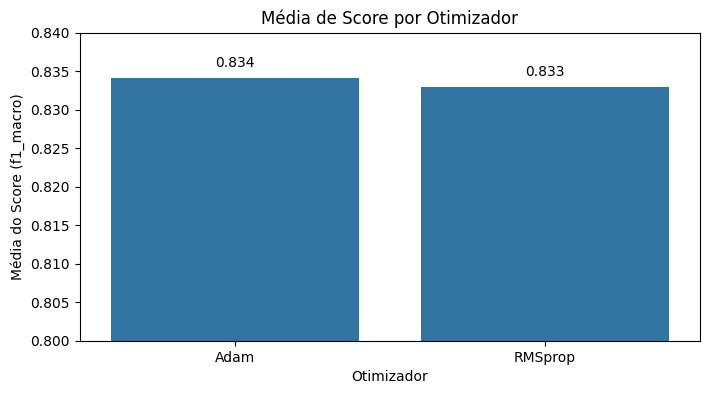

In [ ]:
optimizers_result = results_df[['mean_test_score', 'param_otimizador']]
media_otimizadores = optimizers_result.groupby('param_otimizador')['mean_test_score'].mean().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='param_otimizador', y='mean_test_score', data=media_otimizadores)

for p in ax.patches:
  ax.text(
    p.get_x() + p.get_width() / 2,
    p.get_height() + 0.001,
    f'{p.get_height():.3f}',
    ha='center', va='bottom', fontsize=10, color='black'
  )

plt.xlabel("Otimizador")
plt.ylabel("Média do Score (f1_macro)")
plt.ylim(0.8, 0.84)
plt.title("Média de Score por Otimizador")
plt.show()

In [ ]:
y_pred_gs = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_gs, target_names=['Sem Doença', 'Com Doença']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

  Sem Doença       0.90      0.80      0.85       117
  Com Doença       0.81      0.90      0.85       107

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224



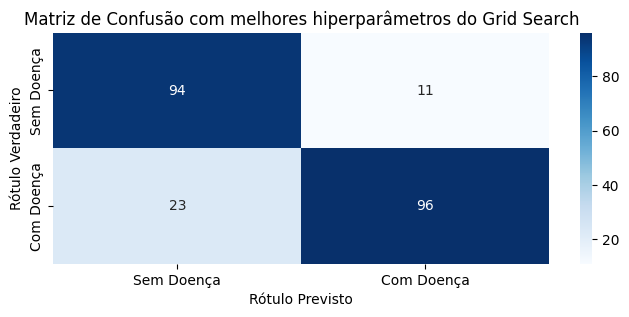

In [ ]:
cm_gs = confusion_matrix(y_pred_gs, y_test)
plt.figure(figsize=(8,3))
sns.heatmap(cm_gs, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão com melhores hiperparâmetros do Grid Search')
plt.show()

## Evolução do Treinamento

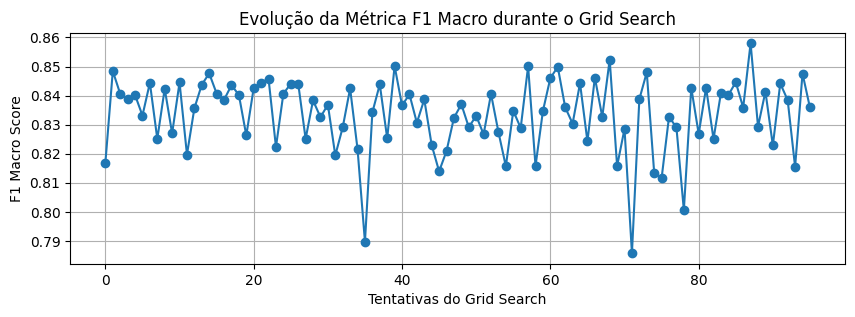

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(results_df.index, results_df["mean_test_score"], marker='o', linestyle='-')
plt.xlabel("Tentativas do Grid Search")
plt.ylabel("F1 Macro Score")
plt.title("Evolução da Métrica F1 Macro durante o Grid Search")
plt.grid(True)
plt.show()

<ipython-input-35-36ba4a670f74>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(
<ipython-input-35-36ba4a670f74>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(
<ipython-input-35-36ba4a670f74>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(
<ipython-input-35-36ba4a670f74>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(
<ipython-input-35-36ba4a670f74>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


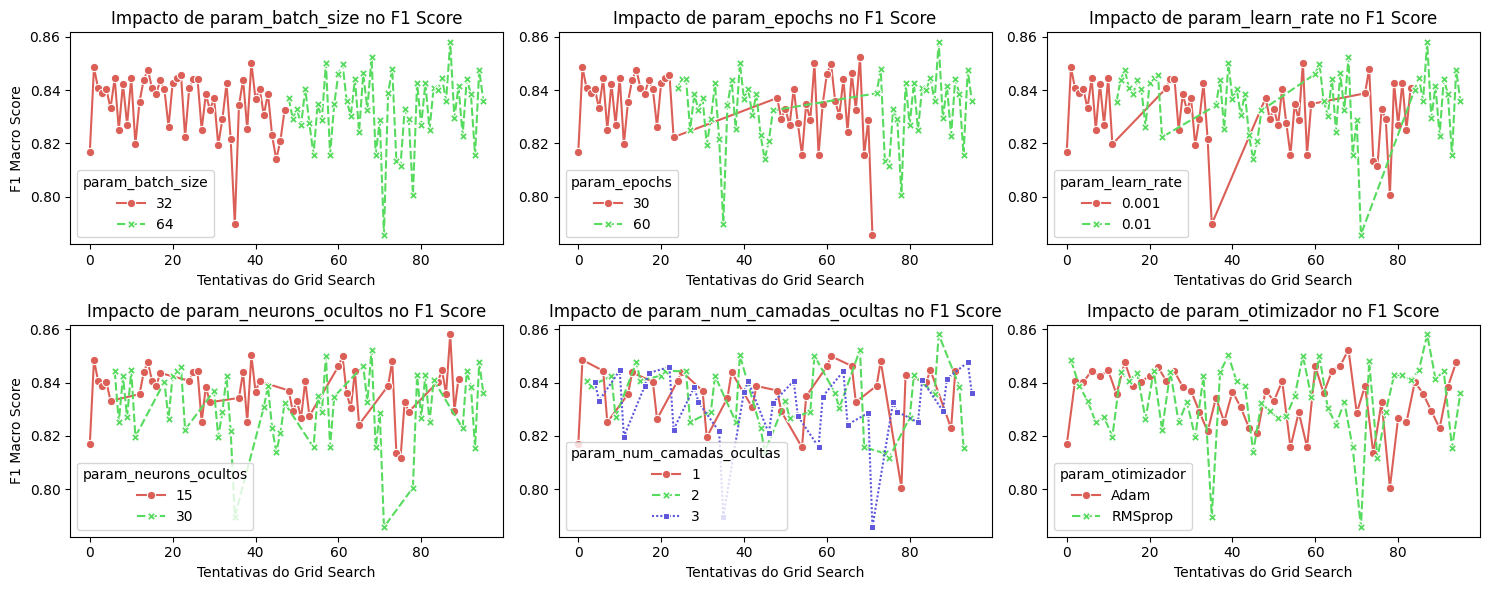

In [ ]:
#@title
parametros = [
  "param_batch_size",
  "param_epochs",
  "param_learn_rate",
  "param_neurons_ocultos",
  "param_num_camadas_ocultas",
  "param_otimizador"
]

num_parametros = len(parametros)
ncols = 3
nrows = (num_parametros // ncols) + (num_parametros % ncols > 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))

axs = axs.flatten()

for i, param in enumerate(parametros):
  sns.lineplot(
    x=results_df.index,
    y="mean_test_score",
    data=results_df,
    hue=param,
    style=param,
    markers=True,
    palette=sns.color_palette("hls", 3),
    ax=axs[i]
  )
  axs[i].set_xlabel("Tentativas do Grid Search")
  if i % ncols == 0:
    axs[i].set_ylabel("F1 Macro Score")
  else:
    axs[i].set_ylabel("")

  axs[i].set_title(f"Impacto de {param} no F1 Score")
  axs[i].set_title(f"Impacto de {param} no F1 Score")

for j in range(i + 1, len(axs)):
  fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Discussões

## Síntese dos resultados

In [ ]:
y_pred_gs = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_gs, target_names=['Sem Doença', 'Com Doença']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

  Sem Doença       0.90      0.80      0.85       117
  Com Doença       0.81      0.90      0.85       107

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224



Os resultados da predição de insuficiência cardíaca por rede neural MLP foram satisfatórios para esses conjuntos de dados. Percebe-se que a escolha dos hiperparâmetros por meio de grid search resultou em um modelo que desempenhou bem quando se observa, por exemplo, a matriz de confusão e o classification report, visto que há um bom equilíbrio entre precisão e revocação.

Entretanto, considerando que problemas médicos precisam "que o modelo acerte quando precisa acertar", ou seja, a presença de falsos negativos pode ser um problema no diagnóstico de pacientes.

Abaixo serão respondidas as perguntas propostas na descrição do problema.

### Qual a precisão, recall e F1-Score do modelo MLP na predição de risco de insuficiência cardíaca com otimização por Grid Search?

O classification report apresentou os seguintes resultados:

* Precisão (Precision):
  * Sem Doença: 0.90
  * Com Doença: 0.81
  * Média Macro: 0.85
  * Média Ponderada: 0.85

* Recall (Sensibilidade):
  * Sem Doença: 0.80
  * Com Doença: 0.90
  * Média Macro: 0.85
  * Média Ponderada: 0.85

* F1-Score:
  * Sem Doença: 0.85
  * Com Doença: 0.85
  * Média Macro: 0.85
  * Média Ponderada: 0.85

A matriz de confusão mostra que o modelo obteve alta taxa de acerto geral, com 96 acertos para pacientes com insuficiência cardíaca e 94 acertos para pacientes sem a condição. No entanto, ainda foram observados 11 falsos positivos e 23 falsos negativos, o que pode ser crítico em um contexto clínico, pois pacientes com insuficiência cardíaca podem não ser diagnosticados corretamente.

### Quais variáveis clínicas têm maior impacto nas predições do modelo?

In [ ]:
feature_names = X_test.columns.tolist()
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

best_model = grid_search.best_estimator_.model_
best_learning_rate = grid_search.best_params_['learn_rate']
best_model.optimizer.learning_rate = best_learning_rate

explainer = shap.Explainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

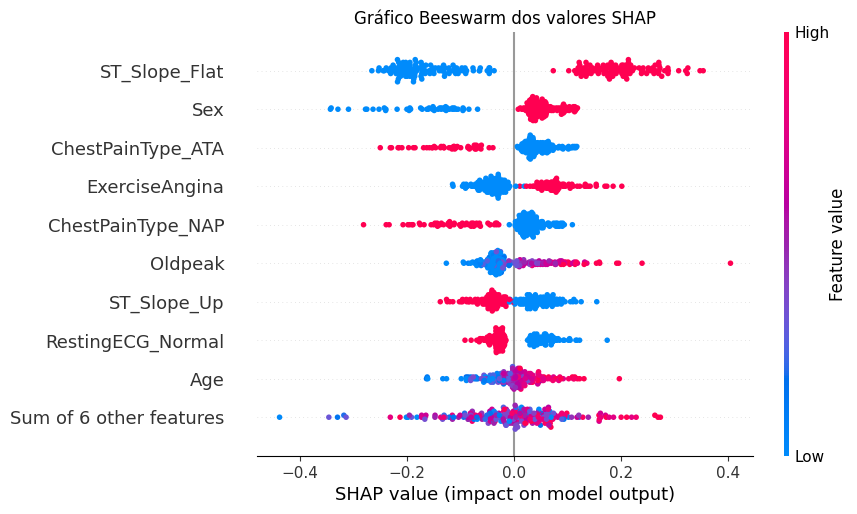

In [ ]:
shap.plots.beeswarm(shap_values[:, :], show=False)
plt.title('Gráfico Beeswarm dos valores SHAP')
plt.show()

A análise do gráfico Beeswarm dos valores SHAP revela as variáveis clínicas com maior impacto nas predições do modelo. As variáveis ST_Slope_Flat, Sex, ChestPainType_ATA, ExerciseAngina e ChestPainType_NAP apresentam os 5 maiores valores absolutos de SHAP, indicando forte influência na decisão do modelo.

* ST_Slope_Flat: Valores altos tendem a aumentar a probabilidade de insuficiência cardíaca, enquanto valores baixos diminuem a probabilidade de insuficiência.

* ChestPainType_ATA: Valores altos tendem a reduzir a probabilidade de insuficiência cardíaca, enquanto valores baixos aumentam a probabilidade de insuficiência.

* ExerciseAngina: Valores altos da dor no peito ao se exercitar tendem a aumentar a probabilidade de insuficiência cardíaca, enquanto valores baixos diminuem a probabilidade de insuficiência.

* ChestPainType_NAP: Valores altos tendem a reduzir a probabilidade de insuficiência cardíaca, enquanto valores baixos aumentam a probabilidade de insuficiência.

Outras variáveis, como ST_Slope_up, RestingECG_Normal, Age e Oldpeak, apresentam influência menor, mas ainda relevante. Valores altos de ST_Slope_up tendem a reduzir a probabilidade de insuficiência cardíaca, enquanto valores baixos aumentam a probabilidade. Além disso, o eletrocardiograma de repouso (ECG) é um fator importante, com um ECG normal reduzindo a probabilidade de insuficiência cardíaca, enquanto padrões anormais aumentam o risco. A idade dos pacientes e o valor de Oldpeak, que é um indicador de depressão do segmento ST, também têm impacto significativo, sendo que valores elevados de Oldpeak e idade estão associados a uma maior probabilidade de insuficiência cardíaca.

Portanto, pacientes do sexo masculino que apresentam dores no peito após o exercício e ST_Slope_Flat elevado, combinados com alta incidência de ChestPainType_ATA e ChestPainType_NAP, configuram um perfil de risco elevado. Esse risco é ainda ampliado em indivíduos com ST_Slope_UP reduzido, ECG anormal, idade avançada e valores elevados de Oldpeak, sugerindo comprometimento cardiovascular significativo.

### Limitações do modelo

Apesar da alta precisão geral, o modelo apresentou 23 falsos negativos na matriz de confusão. Em um contexto clínico, falsos negativos podem ter consequências graves, pois pacientes com a doença podem não receber o tratamento adequado.

Além disso, por questões de poder computacional, o espaço de busca dos hiperparâmetros com grid search precisou ser limitado, o que pode ter privado o modelo de soluções melhores.

# Conclusões

Em resumo, o modelo MLP otimizado por grid search demonstrou desempenho satisfatório, equilibrando precisão e recall, embora os 23 falsos negativos evidenciem riscos críticos em um cenário clínico, onde erros podem comprometer a identificação e tratamento adequado dos pacientes.

A análise dos valores SHAP destacou que variáveis como ST_Slope_Flat, Sex, ChestPainType_ATA, ExerciseAngina e ChestPainType_NAP exercem forte influência na predição, permitindo identificar um perfil de alto risco, especialmente entre indivíduos do sexo masculino que apresentam sinais clínicos adversos, como angina induzida por esforço, ECG anormal, idade avançada e valores elevados de Oldpeak.

Apesar dos resultados positivos gerais, as limitações computacionais no espaço de busca dos hiperparâmetros sugerem que novas otimizações podem ser exploradas para aprimorar ainda mais o modelo e reduzir os potenciais riscos de falsos negativos.

# Referências

Hunt, S. A., Abraham, W. T., Chin, M. H., Feldman, A. M., Francis, G. S., Ganiats, T. G., et al. (2005). “ACC/AHA 2005 Guideline Update for the Diagnosis and Management of Chronic Heart Failure in the Adult: A Report of the American College of Cardiology/American Heart Association Task Force on Practice Guidelines (Writing Committee to Update the 2001 Guidelines for the Evaluation and Management of Heart Failure).” American College of Cardiology web site. Disponível em: http://www.acc.org/clinical/guidelines/failure/index.pdf. Circulation, 112, e154-e235.

Santos, I. S. e Bittencourt, M. S. (2008). “Insuficiência cardíaca.” Revista de Medicina de São Paulo, 87(4), 224-231. Disponível em: https://pesquisa.bvsalud.org/portal/resource/pt/lil-524386.

Lima, M. A., Ferreira, G. G., Oliveira, L. L. C., Diniz, R. F. S., & Ferreira, C. B. (2016). “Uso de Redes Neurais Artificiais (RNA) do tipo Multilayer Perceptrons (MLP) modificado com processamento estatístico em paralelo para estudo do problema de classificação da origem de vinho tinto.” Revista Brasileira de Agropecuária Sustentável, 6(2).

Vassalo, D. H. C. (2023) “Análises de competições presentes na Plataforma Kaggle para auxiliar no desenvolvimento de novas soluções para problemas de visão computacional.” Trabalho de Conclusão de Curso (Bacharelado em Ciência da Computação) - Instituto de Computação, Universidade Federal de Alagoas, Maceió, 2021.
